# TRABALHO DE INTELIGÊNCIA ARTIFICIAL 2

### ALUNOS: 

- Aluno 1: **André Noronha**
- Aluno 2: **Gabriel Alessi**
- Aluno 3: **Isabel Longo**
- Aluno 4: **Leonardo Bellato Antonio**
- Aluno 5: **Paulo Adriano**

## Pré-processamento dos dados

#### Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Importar bases

In [2]:
arquivo = pd.ExcelFile(r'Bases/dados.xlsx')

# Divindo em dataframes diferentes
alunos = pd.read_excel(arquivo, sheet_name='Relacao_Alunos', skiprows=2, index_col=0)
historico = pd.read_excel(arquivo, sheet_name='Historico', skiprows=2, index_col=0)
questionario = pd.read_excel(arquivo, sheet_name='Questionario_socioEconomico', skiprows=2, index_col=0)

#### Visualizar bases

In [3]:
display(alunos)

id  Ano Ingresso  Per. Ingresso  \
#                                           
1     +bwsow          2010              1   
2     f511wn          2010              1   
3     gwhga8          2010              1   
4     t5fkjk          2010              1   
5     3ewz5c          2010              1   
...      ...           ...            ...   
1884  9kwbef          2019              2   
1885  t7rkrz          2019              2   
1886  rx1y6c          2019              2   
1887  qaec48          2019              2   
1888  i1o+1w          2019              2   

                                                  Curso  \
#                                                         
1                                 Ciência Da Computação   
2                                 Ciência Da Computação   
3                                 Ciência Da Computação   
4                                 Ciência Da Computação   
5                                 Ciência Da Computação   
...                                                 ...   
1884  Curso Superior De Tecnologia Em Análise E Dese...   
1885  Curso Superior De Tecnologia Em Análise E Dese...   
1886  Curso Superior De Tecnologia Em Análise E Dese...   
1887  Curso Superior De Tecnologia Em Análise E Dese...   
1888  Curso Superior De Tecnologia Em Análise E Dese...   

                        Forma de Ingresso  \
#                                           
1     SISU - Sistema de Seleção Unificada   
2     SISU - Sistema de Seleção Unificada   
3     SISU - Sistema de Seleção Unificada   
4     SISU - Sistema de Seleção Unificada   
5     SISU - Sistema de Seleção Unificada   
...                                   ...   
1884  SISU - Sistema de Seleção Unificada   
1885  SISU - Sistema de Seleção Unificada   
1886  SISU - Sistema de Seleção Unificada   
1887  SISU - Sistema de Seleção Unificada   
1888  SISU - Sistema de Seleção Unificada   

                                           Tipo de Cota          Sigla Cota  \
#                                                                             
1                                               Cotista             Cotista   
2                                    Ampla concorrência         Não cotista   
3                                               Cotista             Cotista   
4                                    Ampla concorrência         Não cotista   
5                                               Cotista             Cotista   
...                                                 ...                 ...   
1884                                 Ampla concorrência         Não cotista   
1885  Candidatos que, independentemente da renda (ar...  Categoria L05 (3S)   
1886  Candidatos com renda familiar bruta per capita...  Categoria L01 (1S)   
1887                                 Ampla concorrência         Não cotista   
1888                                 Ampla concorrência         Não cotista   

        Escola Pública?  Coeficiente  Escore Vest  ...  Sexo Idade  \
#                                                  ...               
1        Escola Pública       0.0222          NaN  ...     M    37   
2     Escola Particular       0.1852          NaN  ...     M    27   
3        Escola Pública       0.1644          NaN  ...     M    39   
4     Escola Particular       0.0000          NaN  ...     F    30   
5        Escola Pública       0.2559          NaN  ...     M    27   
...                 ...          ...          ...  ...   ...   ...   
1884  Escola Particular       0.0000          NaN  ...     M    18   
1885     Escola Pública       0.7086          NaN  ...     M    32   
1886     Escola Pública       0.0000          NaN  ...     M    22   
1887  Escola Particular       0.0000          NaN  ...     M    31   
1888  Escola Particular       0.0000          NaN  ...     M    20   

      Data Nascimento        Cidade Estado Grupo (Étnico)  \
#                                                           
1        

In [4]:
display(historico)

id Cod. Disciplina                     Nome Disciplina  Per. Aluno  \
#                                                                               
1      a+ntz8           SI31C                          ALGORITMOS           1   
2      a+ntz8           SI31F             COMUNICAÇÃO LINGUÍSTICA           1   
3      a+ntz8           SI31G                    EMPREENDEDORISMO           1   
4      a+ntz8           SI31E                             ÁLGEBRA           1   
5      a+ntz8           SI31A           FUNDAMENTOS DA COMPUTAÇÃO           1   
...       ...             ...                                 ...         ...   
57237  5++m48           AS01F                    EMPREENDEDORISMO           2   
57238  5++m48           AS34C        DESENVOLVIMENTO WEB-SERVIDOR           2   
57239  7yx+1w           CC51B                 MATEMÁTICA DISCRETA           1   
57240  7yx+1w           CC51C    CÁLCULO DIFERENCIAL E INTEGRAL 1           1   
57241  7yx+1w           CC31C  INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO           1   

       Ano Lanç.  Per. Lanç.  Nota  Freq.(%)                 Situação Disc.  \
#                                                                             
1           2007           1   0.0      41.0  Reprovado por Nota/Frequência   
2           2007           1   7.1      97.4   Aprovado por Nota/Frequência   
3           2007           1   9.0      94.7   Aprovado por Nota/Frequência   
4           2007           1   0.6      67.8  Reprovado por Nota/Frequência   
5           2007           1   4.7      84.6             Reprovado por Nota   
...          ...         ...   ...       ...                            ...   
57237       2019           2   7.1      75.0             Crédito Consignado   
57238       2019           2   7.1      75.0             Crédito Consignado   
57239       2019           2   5.4     100.0             Crédito Consignado   
57240       2019           2   5.3     100.0             Crédito Consignado   
57241       2019           2   6.5     100.0             Crédito Consignado   

       Média da Turma  Qtde Alunos Turma  
#                                         
1                 3.7                 46  
2                 5.2                 40  
3                 6.0                 46  
4                 4.9                 47  
5                 5.8                 40  
...               ...                ...  
57237             NaN                  0  
57238             NaN                  0  
57239             NaN                  0  
57240             NaN                  0  
57241             NaN                  0  

[57241 rows x 11 columns]

In [5]:
display(questionario)

id  Cod. Questão  \
#                             
1      acd5ow             1   
2      acd5ow             2   
3      acd5ow             3   
4      acd5ow             4   
5      acd5ow             5   
...       ...           ...   
38952  9+8+gf            21   
38953  9+8+gf            22   
38954  9+8+gf            23   
38955  9+8+gf            24   
38956  9+8+gf            26   

                                                Pergunta  \
#                                                          
1                                                  Sexo:   
2          Você tem Necessidades Educacionais Especiais:   
3            Em relação à cor da pele você se considera:   
4                                          Estado Civil:   
5                                          Naturalidade:   
...                                                  ...   
38952    Você já estudou no antigo CEFET-PR ou na UTFPR?   
38953             Motivo que o levou a escolher a UTFPR?   
38954              Principal motivo da escolha do curso:   
38955              Expectativa com o curso de graduação:   
38956  Quantos livros em média você costuma ler por ano?   

                                                Resposta  
#                                                         
1                                              Masculino  
2                                                   Não.  
3                                                Branco.  
4                                           Solteiro(a).  
5                                         Brasileiro(a).  
...                                                  ...  
38952                                               Não.  
38953         É a que oferece o melhor curso pretendido.  
38954  O curso prepara para uma profissão de acordo c...  
38955                             Todas as opções acima.  
38956                                   De 2 a 5 livros.  

[38956 rows x 4 columns]

In [6]:
# Ajustando colunas do Questionario
questionario.columns = questionario.columns.str.strip() # Removendo espaços em branco no início e fim
questionario['Pergunta'] = questionario['Pergunta'].str.rstrip(':?') # Removendo a pontuação final das perguntas (:, ?)

# Realizando o processo de pivotagem do questionário
questionario = questionario.pivot_table(
    index='id',
    columns='Pergunta',
    values='Resposta',
    aggfunc='first'
).reset_index()
display(questionario)

Pergunta      id A renda total mensal de sua família se situa na faixa de  \
0         +1hm9t                  De dois a cinco salários mínimos.         
1         +1oahc                  De dois a cinco salários mínimos.         
2         +4biin                  De dois a cinco salários mínimos.         
3         +4ismk                  De dois a cinco salários mínimos.         
4         +4jfnz                   De cinco a dez salários mínimos.         
...          ...                                                ...         
1617      zp3xqx                         Menos de 1 salário mínimo.         
1618      zqt8jk                     De um a dois salários mínimos.         
1619      zsxz+t                  De dois a cinco salários mínimos.         
1620      ztdkrz                     De um a dois salários mínimos.         
1621      zxayrz                     De um a dois salários mínimos.         

Pergunta Com quem você mora?   \
0                       Pais.   
1                       Pais.   
2                     Amigos.   
3                       Pais.   
4                    Cônjuge.   
...                       ...   
1617                    Pais.   
1618                  Amigos.   
1619                    Pais.   
1620             Sozinho (a).   
1621             Sozinho (a).   

Pergunta Como pretende se locomover até a UTFPR durante o seu curso  \
0                                                De ônibus.           
1                                                De ônibus.           
2                                                De ônibus.           
3                                     De automóvel próprio.           
4                                                De ônibus.           
...                                                     ...           
1617                                             De ônibus.           
1618                                               De Moto.           
1619        Através de algum familiar que possui automóvel.           
1620                                                  A pé.           
1621                                             De ônibus.           

Pergunta Em que localidade da cidade seu domicílio se encontra  \
0                       Bairro na região central da cidade.      
1                       Bairro na região central da cidade.      
2                                                     Outro      
3                       Bairro na região central da cidade.      
4                       Bairro na região central da cidade.      
...                                                     ...      
1617                    Bairro na região central da cidade.      
1618                    Bairro na região central da cidade.      
1619                         Bairro na periferia da cidade.      
1620                        Condomínio residencial fechado.      
1621                         Bairro na periferia da cidade.      

Pergunta        Em relação ao trabalho, qual a sua situação  \
0                                             Não trabalho.   
1                                             Não trabalho.   
2                                    Empregado assalariado.   
3                                             Não trabalho.   
4         Funcionário público (municipal, estadual ou fe...   
...                                                     ...   
1617                                 Empregado assalariado.   
1618                                 Empregado assalariado.   
1619                      Empregado que ganha por produção.   
1620                                          Não trabalho.   
1621                                 Empregado assalariado.   

Pergunta Em relação à cor da pele você se considera  Estado Civil  \
0                                           Branco.  Solteiro(a).   
1                                           Branco.  Solteiro(a).   
2                                           Branco.  Solteiro(a).   

#### Resumo das bases

In [7]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 1 to 1888
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1888 non-null   object 
 1   Ano Ingresso             1888 non-null   int64  
 2   Per. Ingresso            1888 non-null   int64  
 3   Curso                    1888 non-null   object 
 4   Forma de Ingresso        1888 non-null   object 
 5   Tipo de Cota             1888 non-null   object 
 6   Sigla Cota               1888 non-null   object 
 7   Escola Pública?          1888 non-null   object 
 8   Coeficiente              1888 non-null   float64
 9   Escore Vest              393 non-null    float64
 10  Nota Enem                1440 non-null   float64
 11  Sexo                     1888 non-null   object 
 12  Idade                    1888 non-null   int64  
 13  Data Nascimento          1888 non-null   object 
 14  Cidade                   1870

In [8]:
historico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57241 entries, 1 to 57241
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57241 non-null  object 
 1   Cod. Disciplina    57241 non-null  object 
 2   Nome Disciplina    57241 non-null  object 
 3   Per. Aluno         57241 non-null  int64  
 4   Ano Lanç.          57241 non-null  int64  
 5   Per. Lanç.         57241 non-null  int64  
 6   Nota               57031 non-null  float64
 7   Freq.(%)           56710 non-null  float64
 8   Situação Disc.     57241 non-null  object 
 9   Média da Turma     48020 non-null  float64
 10  Qtde Alunos Turma  57241 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 5.2+ MB


In [9]:
questionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 25 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   id                                                                          1622 non-null   object
 1   A renda total mensal de sua família se situa na faixa de                    1622 non-null   object
 2   Com quem você mora?                                                         1622 non-null   object
 3   Como pretende se locomover até a UTFPR durante o seu curso                  1622 non-null   object
 4   Em que localidade da cidade seu domicílio se encontra                       1622 non-null   object
 5   Em relação ao trabalho, qual a sua situação                                 1622 non-null   object
 6   Em relação à cor da pele você se considera              

Observação: os dados estão com a tipagem correta, então não é necessária nenhuma intervenção nesse sentido.

#### Tratamento de valores nulos

In [10]:
# Exibindo quantos valores nulos existem
print(alunos.isnull().sum())
print("Total de registros: ", alunos.shape[0])

id                            0
Ano Ingresso                  0
Per. Ingresso                 0
Curso                         0
Forma de Ingresso             0
Tipo de Cota                  0
Sigla Cota                    0
Escola Pública?               0
Coeficiente                   0
Escore Vest                1495
Nota Enem                   448
Sexo                          0
Idade                         0
Data Nascimento               0
Cidade                       18
Estado                       18
Grupo (Étnico)                0
Situação Atual do Aluno       0
Período do Aluno              0
Ano Desistência             494
Período Desistências        494
dtype: int64
Total de registros:  1888


In [11]:
# Valores que não é possível supor um valor
alunos['Cidade'] = alunos['Cidade'].fillna('Não informado')
alunos['Estado'] = alunos['Estado'].fillna('Não informado')
alunos['Nota Enem'] = alunos['Nota Enem'].fillna(0)
# Escore Vest tem pouquíssimos dados, então será descartada

# Fazendo uma estimativa de ano de cancelamento
filtro = alunos['Ano Desistência'].isna()
alunos.loc[filtro, 'Ano Desistência'] = alunos[filtro].apply(
    lambda aluno: aluno['Ano Ingresso'] + (aluno['Período do Aluno'] - 1) // 2,
    axis=1
)
# Ajuste de tipagem
alunos['Ano Desistência'] = alunos['Ano Desistência'].astype('int64')

# Fazendo uma estimativa do período de cancelamento
def estimar_periodo(semestre_ingresso, periodo_saida):
    # Funcao faz alternância entre 1 e 2, para determinar o período correto
    semestre = int(semestre_ingresso)
    periodo_saida = int(periodo_saida)
    for _ in range(periodo_saida - 1):
        semestre = 2 if semestre == 1 else 1

    return semestre

filtro = alunos['Período Desistências'].isna()
alunos.loc[filtro, 'Período Desistências'] = alunos[filtro].apply(
    lambda aluno: estimar_periodo(aluno['Per. Ingresso'], aluno['Período do Aluno']),
    axis=1
)
# Ajuste de tipagem
alunos['Período Desistências'] = alunos['Período Desistências'].astype('int64')

# Reexibindo
print(alunos.isnull().sum())

id                            0
Ano Ingresso                  0
Per. Ingresso                 0
Curso                         0
Forma de Ingresso             0
Tipo de Cota                  0
Sigla Cota                    0
Escola Pública?               0
Coeficiente                   0
Escore Vest                1495
Nota Enem                     0
Sexo                          0
Idade                         0
Data Nascimento               0
Cidade                        0
Estado                        0
Grupo (Étnico)                0
Situação Atual do Aluno       0
Período do Aluno              0
Ano Desistência               0
Período Desistências          0
dtype: int64


In [12]:
# Exibindo quantos valores nulos existem
print(historico.isnull().sum())
print("Total de registros: ", historico.shape[0])

id                      0
Cod. Disciplina         0
Nome Disciplina         0
Per. Aluno              0
Ano Lanç.               0
Per. Lanç.              0
Nota                  210
Freq.(%)              531
Situação Disc.          0
Média da Turma       9221
Qtde Alunos Turma       0
dtype: int64
Total de registros:  57241


In [13]:
# Nota e frequência são valores muito importantes, e como são poucos valores nulos e não é possível supor, melhor remover essas linhas
historico = historico.dropna(subset=['Nota', 'Freq.(%)'], axis=0)

# A média da turma é um valor importante, não pode ser simplesmente zerado ou removido
# Calculando a média da disciplina em outras turmas
historico['Média da Turma'] = historico.groupby('Nome Disciplina')['Média da Turma'].transform(lambda x: x.fillna(x.mean()))
# Os dados que ainda faltam, completa com a média geral
media_geral = historico['Média da Turma'].mean()
historico['Média da Turma'] = historico['Média da Turma'].fillna(media_geral)

# Reexibindo
print(historico.isnull().sum())

id                   0
Cod. Disciplina      0
Nome Disciplina      0
Per. Aluno           0
Ano Lanç.            0
Per. Lanç.           0
Nota                 0
Freq.(%)             0
Situação Disc.       0
Média da Turma       0
Qtde Alunos Turma    0
dtype: int64


In [14]:
# Exibindo quantos valores nulos existem
print(questionario.isnull().sum())
print("Total de registros: ", questionario.shape[0])

Pergunta
id                                                                            0
A renda total mensal de sua família se situa na faixa de                      0
Com quem você mora?                                                           0
Como pretende se locomover até a UTFPR durante o seu curso                    0
Em que localidade da cidade seu domicílio se encontra                         0
Em relação ao trabalho, qual a sua situação                                   0
Em relação à cor da pele você se considera                                    0
Estado Civil                                                                  0
Expectativa com o curso de graduação                                          0
Motivo que o levou a escolher a UTFPR                                         0
Naturalidade                                                                  0
Necessita de trabalhar durante o curso                                        0
Número de membros da sua famíli

#### Cardinalidade dos dados

In [15]:
for col in alunos.columns:
    print(f'Cardinalidade da coluna "{col}":')
    print(alunos[col].value_counts(dropna=False))
    print('-' * 40)

Cardinalidade da coluna "id":
id
+bwsow    1
s38uff    1
ezf15c    1
tkuewn    1
heuewn    1
         ..
63rj8f    1
my19in    1
u5rj8f    1
39ne7c    1
i1o+1w    1
Name: count, Length: 1888, dtype: int64
----------------------------------------
Cardinalidade da coluna "Ano Ingresso":
Ano Ingresso
2019    162
2014    155
2016    155
2017    153
2015    151
2018    151
2010    150
2011    146
2013    146
2012    140
2007    129
2009    129
2008    121
Name: count, dtype: int64
----------------------------------------
Cardinalidade da coluna "Per. Ingresso":
Per. Ingresso
1    1005
2     883
Name: count, dtype: int64
----------------------------------------
Cardinalidade da coluna "Curso":
Curso
Curso Superior De Tecnologia Em Análise E Desenvolvimento De Sistemas    998
Ciência Da Computação                                                    890
Name: count, dtype: int64
----------------------------------------
Cardinalidade da coluna "Forma de Ingresso":
Forma de Ingresso
SISU - Sistem

In [16]:
for col in historico.columns:
    print(f'Cardinalidade da coluna "{col}":')
    print(historico[col].value_counts(dropna=False))
    print('-' * 40)

Cardinalidade da coluna "id":
id
mzzajk    143
iora9t    143
w137ff    131
n+zrnz    127
8kqbnz    127
         ... 
t5fkjk      2
5gx+1w      2
gormxx      1
kx6zsn      1
nzwpnz      1
Name: count, Length: 1800, dtype: int64
----------------------------------------
Cardinalidade da coluna "Cod. Disciplina":
Cod. Disciplina
SI31D    859
SI31C    853
SI31E    848
CC31D    761
CC31G    743
        ... 
ET05I      1
AI32E      1
EM34A      1
EM34B      1
AS01B      1
Name: count, Length: 462, dtype: int64
----------------------------------------
Cardinalidade da coluna "Nome Disciplina":
Nome Disciplina
ALGORITMOS                                       2660
EMPREENDEDORISMO                                 1663
PROBABILIDADE E ESTATÍSTICA                      1515
COMUNICAÇÃO LINGUÍSTICA                          1463
GEOMETRIA ANALÍTICA E ÁLGEBRA LINEAR             1320
                                                 ... 
INGLÊS 1                                            1
RELAÇÕES HUMA

In [17]:
for col in questionario.columns:
    print(f'Cardinalidade da coluna "{col}":')
    print(questionario[col].value_counts(dropna=False))
    print('-' * 40)

Cardinalidade da coluna "id":
id
+1hm9t    1
o3jgpx    1
ob+pqx    1
oayygf    1
o88mxx    1
         ..
bkebtw    1
bk9bnz    1
bjht+t    1
bibiin    1
zxayrz    1
Name: count, Length: 1622, dtype: int64
----------------------------------------
Cardinalidade da coluna "A renda total mensal de sua família se situa na faixa de":
A renda total mensal de sua família se situa na faixa de
De dois a cinco salários mínimos.        713
De um a dois salários mínimos.           373
De cinco a dez salários mínimos.         334
De dez a quinze salários mínimo.          86
Menos de 1 salário mínimo.                59
De quinze a vinte salários mínimo.        34
De vinte a quarenta salários mínimos.     18
Mais de quarenta salários mínimos.         5
Name: count, dtype: int64
----------------------------------------
Cardinalidade da coluna "Com quem você mora? ":
Com quem você mora? 
Pais.               746
Amigos.             321
Sozinho (a).        226
Parentes.            94
Outros:              

#### Tratamento dos valores duplicados, caso existam

In [18]:
alunos.duplicated().sum()

0

In [19]:
historico.duplicated().sum()

0

In [20]:
print(questionario.duplicated().sum())

0


#### Exclusão de linhas e colunas desnecessárias

In [21]:
alunos = alunos.drop(columns=['Escore Vest', 'Data Nascimento'])
# Justificativa:
# - Escore Vest: pouquíssimos dados
# - Data Nascimento: irrelevante, já que temos a idade

display(alunos)

id  Ano Ingresso  Per. Ingresso  \
#                                           
1     +bwsow          2010              1   
2     f511wn          2010              1   
3     gwhga8          2010              1   
4     t5fkjk          2010              1   
5     3ewz5c          2010              1   
...      ...           ...            ...   
1884  9kwbef          2019              2   
1885  t7rkrz          2019              2   
1886  rx1y6c          2019              2   
1887  qaec48          2019              2   
1888  i1o+1w          2019              2   

                                                  Curso  \
#                                                         
1                                 Ciência Da Computação   
2                                 Ciência Da Computação   
3                                 Ciência Da Computação   
4                                 Ciência Da Computação   
5                                 Ciência Da Computação   
...                                                 ...   
1884  Curso Superior De Tecnologia Em Análise E Dese...   
1885  Curso Superior De Tecnologia Em Análise E Dese...   
1886  Curso Superior De Tecnologia Em Análise E Dese...   
1887  Curso Superior De Tecnologia Em Análise E Dese...   
1888  Curso Superior De Tecnologia Em Análise E Dese...   

                        Forma de Ingresso  \
#                                           
1     SISU - Sistema de Seleção Unificada   
2     SISU - Sistema de Seleção Unificada   
3     SISU - Sistema de Seleção Unificada   
4     SISU - Sistema de Seleção Unificada   
5     SISU - Sistema de Seleção Unificada   
...                                   ...   
1884  SISU - Sistema de Seleção Unificada   
1885  SISU - Sistema de Seleção Unificada   
1886  SISU - Sistema de Seleção Unificada   
1887  SISU - Sistema de Seleção Unificada   
1888  SISU - Sistema de Seleção Unificada   

                                           Tipo de Cota          Sigla Cota  \
#                                                                             
1                                               Cotista             Cotista   
2                                    Ampla concorrência         Não cotista   
3                                               Cotista             Cotista   
4                                    Ampla concorrência         Não cotista   
5                                               Cotista             Cotista   
...                                                 ...                 ...   
1884                                 Ampla concorrência         Não cotista   
1885  Candidatos que, independentemente da renda (ar...  Categoria L05 (3S)   
1886  Candidatos com renda familiar bruta per capita...  Categoria L01 (1S)   
1887                                 Ampla concorrência         Não cotista   
1888                                 Ampla concorrência         Não cotista   

        Escola Pública?  Coeficiente  Nota Enem Sexo  Idade        Cidade  \
#                                                                           
1        Escola Pública       0.0222     634.30    M     37  Ponta Grossa   
2     Escola Particular       0.1852     623.20    M     27        Ibaiti   
3        Escola Pública       0.1644     588.90    M     39      Curitiba   
4     Escola Particular       0.0000     683.20    F     30        Castro   
5        Escola Pública       0.2559     650.50    M     27   São Vicente   
...                 ...          ...        ...  ...    ...           ...   
1884  Escola Particular       0.0000     703.23    M     18      Carambeí   
1885     Escola Pública       0.7086     642.93    M     32  Ponta Grossa   
1886     Escola Pública       0.0000     614.30    M     22     Fortaleza   
1887  Escola Particular       0.0000     684.28    M     31  Ponta Grossa   
1888  Escola Particular       0.0000     673.67    M     20  Ponta Grossa   

     Estado Grupo (Étnico) Situação Atua

In [22]:
historico = historico.drop(columns=['Cod. Disciplina', 'Per. Aluno'])
# Justificativa:
# - Cod. Disciplina: irrelavante, já que temos o nome da disciplina
# - Per. Aluno: seria relevante apenas se fizemos uma análise muito especifíca, analisando o desempenho de cada aluno em cada período cursado por ele

display(historico)

id                     Nome Disciplina  Ano Lanç.  Per. Lanç.  \
#                                                                          
1      a+ntz8                          ALGORITMOS       2007           1   
2      a+ntz8             COMUNICAÇÃO LINGUÍSTICA       2007           1   
3      a+ntz8                    EMPREENDEDORISMO       2007           1   
4      a+ntz8                             ÁLGEBRA       2007           1   
5      a+ntz8           FUNDAMENTOS DA COMPUTAÇÃO       2007           1   
...       ...                                 ...        ...         ...   
57237  5++m48                    EMPREENDEDORISMO       2019           2   
57238  5++m48        DESENVOLVIMENTO WEB-SERVIDOR       2019           2   
57239  7yx+1w                 MATEMÁTICA DISCRETA       2019           2   
57240  7yx+1w    CÁLCULO DIFERENCIAL E INTEGRAL 1       2019           2   
57241  7yx+1w  INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO       2019           2   

       Nota  Freq.(%)                 Situação Disc.  Média da Turma  \
#                                                                      
1       0.0      41.0  Reprovado por Nota/Frequência        3.700000   
2       7.1      97.4   Aprovado por Nota/Frequência        5.200000   
3       9.0      94.7   Aprovado por Nota/Frequência        6.000000   
4       0.6      67.8  Reprovado por Nota/Frequência        4.900000   
5       4.7      84.6             Reprovado por Nota        5.800000   
...     ...       ...                            ...             ...   
57237   7.1      75.0             Crédito Consignado        7.170074   
57238   7.1      75.0             Crédito Consignado        4.805323   
57239   5.4     100.0             Crédito Consignado        5.243933   
57240   5.3     100.0             Crédito Consignado        3.142110   
57241   6.5     100.0             Crédito Consignado        6.287352   

       Qtde Alunos Turma  
#                         
1                     46  
2                     40  
3                     46  
4                     47  
5                     40  
...                  ...  
57237                  0  
57238                  0  
57239                  0  
57240                  0  
57241                  0  

[56710 rows x 9 columns]

In [23]:
questionario = questionario.drop(columns=['Sexo', 'Em relação à cor da pele você se considera'])
# Justificativa:
# - "Sexo:": irrelavante, já que temos esse dado em outra tabela
# - "Em relação à cor da pele você se considera:": irrelavante, já que temos esse dado em outra tabela

display(questionario)

Pergunta      id A renda total mensal de sua família se situa na faixa de  \
0         +1hm9t                  De dois a cinco salários mínimos.         
1         +1oahc                  De dois a cinco salários mínimos.         
2         +4biin                  De dois a cinco salários mínimos.         
3         +4ismk                  De dois a cinco salários mínimos.         
4         +4jfnz                   De cinco a dez salários mínimos.         
...          ...                                                ...         
1617      zp3xqx                         Menos de 1 salário mínimo.         
1618      zqt8jk                     De um a dois salários mínimos.         
1619      zsxz+t                  De dois a cinco salários mínimos.         
1620      ztdkrz                     De um a dois salários mínimos.         
1621      zxayrz                     De um a dois salários mínimos.         

Pergunta Com quem você mora?   \
0                       Pais.   
1                       Pais.   
2                     Amigos.   
3                       Pais.   
4                    Cônjuge.   
...                       ...   
1617                    Pais.   
1618                  Amigos.   
1619                    Pais.   
1620             Sozinho (a).   
1621             Sozinho (a).   

Pergunta Como pretende se locomover até a UTFPR durante o seu curso  \
0                                                De ônibus.           
1                                                De ônibus.           
2                                                De ônibus.           
3                                     De automóvel próprio.           
4                                                De ônibus.           
...                                                     ...           
1617                                             De ônibus.           
1618                                               De Moto.           
1619        Através de algum familiar que possui automóvel.           
1620                                                  A pé.           
1621                                             De ônibus.           

Pergunta Em que localidade da cidade seu domicílio se encontra  \
0                       Bairro na região central da cidade.      
1                       Bairro na região central da cidade.      
2                                                     Outro      
3                       Bairro na região central da cidade.      
4                       Bairro na região central da cidade.      
...                                                     ...      
1617                    Bairro na região central da cidade.      
1618                    Bairro na região central da cidade.      
1619                         Bairro na periferia da cidade.      
1620                        Condomínio residencial fechado.      
1621                         Bairro na periferia da cidade.      

Pergunta        Em relação ao trabalho, qual a sua situação  Estado Civil  \
0                                             Não trabalho.  Solteiro(a).   
1                                             Não trabalho.  Solteiro(a).   
2                                    Empregado assalariado.  Solteiro(a).   
3                                             Não trabalho.  Solteiro(a).   
4         Funcionário público (municipal, estadual ou fe...    Casado(a).   
...                                                     ...           ...   
1617                                 Empregado assalariado.  Solteiro(a).   
1618                                 Empregado assalariado.  Solteiro(a).   
1619                      Empregado que ganha por produção.  Solteiro(a).   
1620                                          Não trabalho.  Solteiro(a).   
1621                                 Empregado assalariado.  Solteiro(a).   

Pergunta Expectativa com o curso de graduação  \
0                      Formação profissional.   
1        

#### Verificando informações estatísticas da base (por curso, apenas evasores)

Primeiramente, gerando informações de desempenho de alunos: média de suas notas e da frequência, além da quantidade de reprovações e cancelamentos

In [24]:
analise_desempenho = (
    historico[['id', 'Nota', 'Freq.(%)', 'Situação Disc.']]
    .groupby('id')
    .agg(
        media_nota=('Nota', 'mean'),
        media_frequencia=('Freq.(%)', 'mean'),
        qtd_reprovacoes=('Situação Disc.', lambda x: (x.str.contains('Reprovado')).sum()),
        qtd_desistencias=('Situação Disc.', lambda x: (x.str.contains('Cancelado')).sum())
    )
    .reset_index()
)

# Renomeando com espaços
analise_desempenho.rename(columns={
    'media_nota': 'Média de Nota',
    'media_frequencia': 'Média de Frequência',
    'qtd_reprovacoes': 'Quantidade de Reprovações',
    'qtd_desistencias': 'Quantidade de Cancelamentos'
}, inplace=True)

display(analise_desempenho)

alunos = alunos.merge(analise_desempenho, on='id', how='inner')

id  Média de Nota  Média de Frequência  Quantidade de Reprovações  \
0     +1hm9t       5.509677            80.533871                         25   
1     +1oahc       0.000000            24.383333                          6   
2     +4biin       7.940909            85.296970                          0   
3     +4ismk       7.616667            93.666667                          0   
4     +4jfnz       8.268293            84.019512                          1   
...      ...            ...                  ...                        ...   
1795  zsxz+t       3.037500            61.658333                         14   
1796  zu4gnz       1.085714            37.271429                          6   
1797  zunkrz       7.225000            85.666667                          0   
1798  zx768f       7.628571            78.142857                          0   
1799  zxayrz       1.722222            34.711111                          4   

      Quantidade de Cancelamentos  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
1795                            4  
1796                            0  
1797                            0  
1798                            0  
1799                            4  

[1800 rows x 5 columns]

In [26]:
# Filtrando alunos evasores
alunos['evasor'] = alunos['Situação Atual do Aluno'].isin([
    'Desistente', 'Jubilado', 'Expulso', 'Transferido', 'Mudou de Curso'
])
alunos = alunos.drop('Situação Atual do Aluno', axis=1)

alunos_evasores = alunos[alunos['evasor']]

Ciência da Computação

In [27]:
# Filtrando alunos pelo curso
alunos_bcc = alunos_evasores[alunos_evasores['Curso'] == 'Ciência Da Computação']
historico_bcc = historico[historico['id'].isin(alunos_bcc['id'])]
questionario_bcc = questionario[questionario['id'].isin(alunos_bcc['id'])]

In [28]:
# Dados numéricos
alunos_bcc.describe()

Ano Ingresso  Per. Ingresso  Coeficiente   Nota Enem       Idade  \
count    482.000000     482.000000   482.000000  482.000000  482.000000   
mean    2013.643154       1.510373     0.304085  600.756577   25.045643   
std        2.597225       0.500412     0.213219   97.270618    4.761461   
min     2010.000000       1.000000     0.000000    0.000000   17.000000   
25%     2011.250000       1.000000     0.134150  565.925000   22.000000   
50%     2013.000000       2.000000     0.295150  614.650000   24.000000   
75%     2016.000000       2.000000     0.466100  651.317500   27.000000   
max     2019.000000       2.000000     0.844200  759.000000   63.000000   

       Período do Aluno  Ano Desistência  Período Desistências  Média de Nota  \
count        482.000000       482.000000            482.000000     482.000000   
mean           1.699170      2015.576763              1.491701       3.184372   
std            1.254828         2.553242              0.500451       2.141965   
min            1.000000      2010.000000              1.000000       0.000000   
25%            1.000000      2014.000000              1.000000       1.512500   
50%            1.000000      2016.000000              1.000000       3.160150   
75%            2.000000      2018.000000              2.000000       4.928607   
max            8.000000      2019.000000              2.000000       8.440000   

       Média de Frequência  Quantidade de Reprovações  \
count           482.000000                 482.000000   
mean             62.133687                  11.037344   
std              24.630982                  11.627923   
min               0.000000                   0.000000   
25%              48.846131                   4.000000   
50%              67.913690                   6.000000   
75%              79.873750                  15.000000   
max              99.080000                  71.000000   

       Quantidade de Cancelamentos  
count                   482.000000  
mean                      1.593361  
std                       2.818966  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       3.000000  
max                      23.000000

In [29]:
# Dados não numéricos
alunos_bcc.describe(include=['object'])

id                  Curso                    Forma de Ingresso  \
count      482                    482                                  482   
unique     482                      1                                    4   
top     +bwsow  Ciência Da Computação  SISU - Sistema de Seleção Unificada   
freq         1                    482                                  475   

              Tipo de Cota   Sigla Cota Escola Pública? Sexo        Cidade  \
count                  482          482             482  482           482   
unique                  11           11               2    2           130   
top     Ampla concorrência  Não cotista  Escola Pública    M  Ponta Grossa   
freq                   278          278             263  410           248   

       Estado Grupo (Étnico)  
count     482            482  
unique     18              5  
top        PR  Não declarado  
freq      329            251

In [30]:
# Dados numéricos
historico_bcc.describe()

Ano Lanç.    Per. Lanç.          Nota      Freq.(%)  Média da Turma  \
count  11017.000000  11017.000000  11017.000000  11017.000000    11017.000000   
mean    2014.131433      1.526550      4.124244     69.968766        5.273947   
std        2.188711      0.499499      3.410323     29.572894        1.684586   
min     2010.000000      0.000000      0.000000      0.000000        0.500000   
25%     2012.000000      1.000000      0.200000     57.900000        4.300000   
50%     2014.000000      2.000000      4.400000     80.600000        5.300000   
75%     2016.000000      2.000000      7.100000     90.800000        6.400000   
max     2019.000000      2.000000     10.000000    100.000000        9.800000   

       Qtde Alunos Turma  
count       11017.000000  
mean           35.651902  
std            31.437134  
min             0.000000  
25%            24.000000  
50%            37.000000  
75%            44.000000  
max           252.000000

In [31]:
# Dados não numéricos
historico_bcc.describe(include=['object'])

id Nome Disciplina                Situação Disc.
count    11017           11017                         11017
unique     482             245                             8
top     iora9t      ALGORITMOS  Aprovado por Nota/Frequência
freq       143             696                          3637

In [32]:
# Dados numéricos: não tem
# Dados não numéricos:
questionario_bcc.describe(include=['object'])

Pergunta      id A renda total mensal de sua família se situa na faixa de  \
count        438                                                438         
unique       438                                                  8         
top       +1oahc                  De dois a cinco salários mínimos.         
freq           1                                                175         

Pergunta Com quem você mora?   \
count                     438   
unique                      8   
top                     Pais.   
freq                      181   

Pergunta Como pretende se locomover até a UTFPR durante o seu curso  \
count                                                   438           
unique                                                    7           
top                                              De ônibus.           
freq                                                    370           

Pergunta Em que localidade da cidade seu domicílio se encontra  \
count                                                   438      
unique                                                    6      
top                     Bairro na região central da cidade.      
freq                                                    236      

Pergunta Em relação ao trabalho, qual a sua situação  Estado Civil  \
count                                            438           438   
unique                                            10             5   
top                                    Não trabalho.  Solteiro(a).   
freq                                             401           422   

Pergunta Expectativa com o curso de graduação  \
count                                     438   
unique                                      4   
top                    Todas as opções acima.   
freq                                      248   

Pergunta       Motivo que o levou a escolher a UTFPR    Naturalidade  ...  \
count                                            438             438  ...   
unique                                             8               2  ...   
top       É a que oferece o melhor curso pretendido.  Brasileiro(a).  ...   
freq                                             250             433  ...   

Pergunta Qual a sua participação na vida econômica do grupo familiar  \
count                                                   438            
unique                                                    6            
top       Não trabalho e sou sustentado por minha famíli...            
freq                                                    391            

Pergunta Qual o grau máximo de escolaridade da sua mãe  \
count                                              438   
unique                                              11   
top                          Ensino superior completo.   
freq                                               119   

Pergunta Qual o grau máximo de escolaridade do seu pai  \
count                                              438   
unique                                              11   
top                             Ensino médio completo.   
freq                                               128   

Pergunta Quantas pessoas (contando com você) contribuem para a renda da sua família  \
count                                                   438                           
unique                                                    5                           
top                                                   Duas.                           
freq                                                    197                           

Pergunta Quantos livros em média você costuma ler por ano  \
count                                                 438   
unique                                                  8   
top                                      De 2 a 5 livros.   
freq                                                  212   

Pergunta     Você cursou o Ensino Médio  \
count                               438   
unique 

Análise e Desenvolvimento de Sistemas

In [33]:
# Filtrando alunos pelo curso
alunos_ads = alunos_evasores[alunos_evasores['Curso'] == 'Curso Superior De Tecnologia Em Análise E Desenvolvimento De Sistemas']
historico_ads = historico[historico['id'].isin(alunos_ads['id'])]
questionario_ads = questionario[questionario['id'].isin(alunos_ads['id'])]

In [34]:
# Dados numéricos
alunos_ads.describe()

Ano Ingresso  Per. Ingresso  Coeficiente   Nota Enem       Idade  \
count    525.000000     525.000000   525.000000  525.000000  525.000000   
mean    2011.161905       1.417143     0.362357  341.699029   29.845714   
std        3.383626       0.493557     0.237804  309.893140    6.198144   
min     2007.000000       1.000000     0.000000    0.000000   18.000000   
25%     2008.000000       1.000000     0.188000    0.000000   26.000000   
50%     2011.000000       1.000000     0.368570  561.200000   29.000000   
75%     2014.000000       2.000000     0.533300  625.200000   32.000000   
max     2019.000000       2.000000     0.978000  794.200000   62.000000   

       Período do Aluno  Ano Desistência  Período Desistências  Média de Nota  \
count        525.000000       525.000000            525.000000     525.000000   
mean           2.350476      2013.375238              1.493333       3.631023   
std            1.420617         3.426735              0.500432       2.320377   
min            1.000000      2007.000000              1.000000       0.000000   
25%            1.000000      2011.000000              1.000000       2.000000   
50%            2.000000      2013.000000              1.000000       3.781250   
75%            3.000000      2016.000000              2.000000       5.179412   
max            6.000000      2019.000000              2.000000       9.791667   

       Média de Frequência  Quantidade de Reprovações  \
count           525.000000                 525.000000   
mean             59.412803                  10.224762   
std              22.865767                   9.200635   
min               0.000000                   0.000000   
25%              46.157143                   5.000000   
50%              63.936364                   7.000000   
75%              76.234247                  13.000000   
max              99.585714                  55.000000   

       Quantidade de Cancelamentos  
count                   525.000000  
mean                      1.167619  
std                       2.667034  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                      27.000000

In [35]:
# Dados não numéricos
alunos_ads.describe(include=['object'])

id                                              Curso  \
count      525                                                525   
unique     525                                                  1   
top     f8kucx  Curso Superior De Tecnologia Em Análise E Dese...   
freq         1                                                525   

                          Forma de Ingresso        Tipo de Cota   Sigla Cota  \
count                                   525                 525          525   
unique                                    6                  12           12   
top     SISU - Sistema de Seleção Unificada  Ampla concorrência  Não cotista   
freq                                    296                 242          242   

       Escola Pública? Sexo        Cidade Estado Grupo (Étnico)  
count              525  525           525    525            525  
unique               3    2            50      5              6  
top     Escola Pública    M  Ponta Grossa     PR  Não declarado  
freq               312  440           393    489            245

In [36]:
# Dados numéricos
historico_ads.describe()

Ano Lanç.    Per. Lanç.          Nota      Freq.(%)  Média da Turma  \
count  11324.000000  11324.000000  11324.000000  11324.000000    11324.000000   
mean    2011.739845      1.488078      4.377861     65.588264        5.449918   
std        3.030499      0.499880      3.527002     32.201938        1.344839   
min     2002.000000      1.000000      0.000000      0.000000        1.900000   
25%     2009.000000      1.000000      0.000000     41.200000        4.500000   
50%     2012.000000      1.000000      5.400000     80.000000        5.400000   
75%     2014.000000      2.000000      7.500000     90.000000        6.400000   
max     2019.000000      2.000000     10.000000    100.000000        9.900000   

       Qtde Alunos Turma  
count       11324.000000  
mean           30.206641  
std            14.043901  
min             0.000000  
25%            23.000000  
50%            34.000000  
75%            41.000000  
max           177.000000

In [37]:
# Dados não numéricos
historico_ads.describe(include=['object'])

id Nome Disciplina                Situação Disc.
count    11324           11324                         11324
unique     525             125                            10
top     1+ftcx      ALGORITMOS  Aprovado por Nota/Frequência
freq        88             767                          4013

In [38]:
# Dados numéricos: não tem
# Dados não numéricos:
questionario_ads.describe(include=['object'])

Pergunta      id A renda total mensal de sua família se situa na faixa de  \
count        369                                                369         
unique       369                                                  8         
top       +1hm9t                  De dois a cinco salários mínimos.         
freq           1                                                164         

Pergunta Com quem você mora?   \
count                     369   
unique                      8   
top                     Pais.   
freq                      192   

Pergunta Como pretende se locomover até a UTFPR durante o seu curso  \
count                                                   369           
unique                                                    7           
top                                              De ônibus.           
freq                                                    251           

Pergunta Em que localidade da cidade seu domicílio se encontra  \
count                                                   369      
unique                                                    7      
top                     Bairro na região central da cidade.      
freq                                                    167      

Pergunta Em relação ao trabalho, qual a sua situação  Estado Civil  \
count                                            369           369   
unique                                            12             6   
top                                    Não trabalho.  Solteiro(a).   
freq                                             147           304   

Pergunta Expectativa com o curso de graduação  \
count                                     369   
unique                                      4   
top                    Todas as opções acima.   
freq                                      193   

Pergunta       Motivo que o levou a escolher a UTFPR    Naturalidade  ...  \
count                                            369             369  ...   
unique                                             8               2  ...   
top       É a que oferece o melhor curso pretendido.  Brasileiro(a).  ...   
freq                                             234             368  ...   

Pergunta Qual a sua participação na vida econômica do grupo familiar  \
count                                                   369            
unique                                                    6            
top       Não trabalho e sou sustentado por minha famíli...            
freq                                                    139            

Pergunta Qual o grau máximo de escolaridade da sua mãe  \
count                                              369   
unique                                              11   
top                             Ensino médio completo.   
freq                                               121   

Pergunta Qual o grau máximo de escolaridade do seu pai  \
count                                              369   
unique                                              10   
top                             Ensino médio completo.   
freq                                               112   

Pergunta Quantas pessoas (contando com você) contribuem para a renda da sua família  \
count                                                   369                           
unique                                                    6                           
top                                                   Duas.                           
freq                                                    152                           

Pergunta Quantos livros em média você costuma ler por ano  \
count                                                 369   
unique                                                  8   
top                                      De 2 a 5 livros.   
freq                                                  171   

Pergunta     Você cursou o Ensino Médio  \
count                               369   
unique 

#### Análise gráfica dos dados

Desistência ao longo dos anos

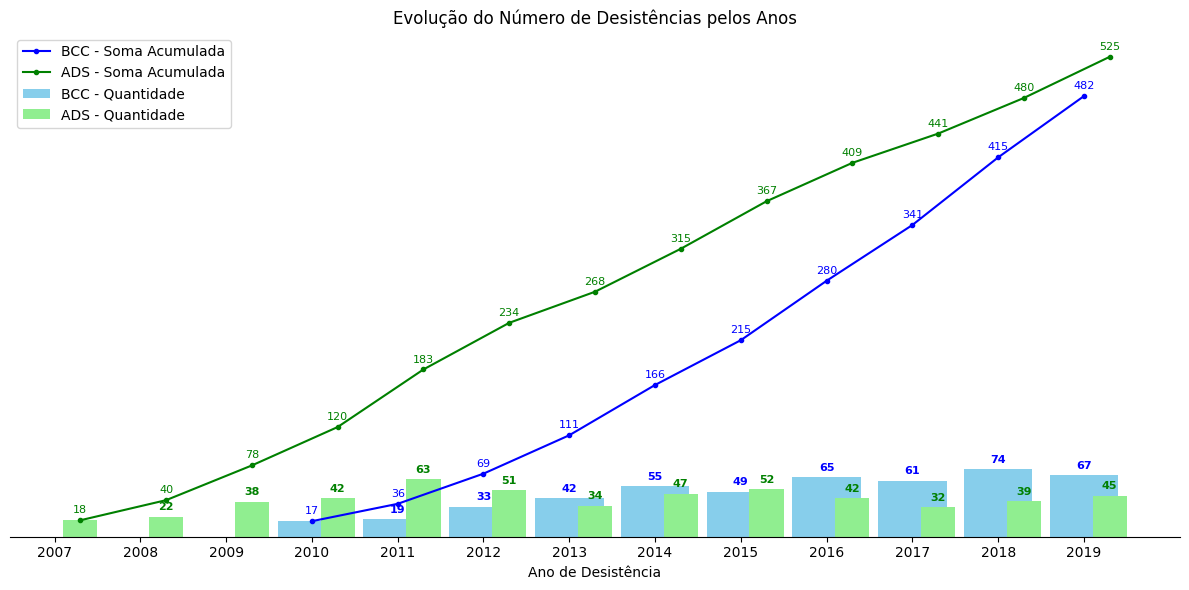

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

# Agrupando por ano e fazendo a contagem
desistencias_bcc = alunos_bcc.groupby('Ano Desistência')['id'].count().reset_index()
desistencias_bcc.rename(columns={'id': 'Quantidade de alunos'}, inplace=True)
desistencias_bcc = desistencias_bcc.sort_values(by='Ano Desistência', ascending=True)
desistencias_bcc['Soma Acumulada'] = desistencias_bcc['Quantidade de alunos'].cumsum()
# BCC
bars_bcc = ax.bar(
    desistencias_bcc['Ano Desistência'],
    desistencias_bcc['Quantidade de alunos'],
    color='skyblue',
    label='BCC - Quantidade'
)

ax.plot(
    desistencias_bcc['Ano Desistência'],
    desistencias_bcc['Soma Acumulada'],
    color='blue',
    marker='o',
    markersize=3,
    label='BCC - Soma Acumulada'
)

# ADS
# Agrupando por ano e fazendo a contagem
desistencia_ads = alunos_ads.groupby('Ano Desistência')['id'].count().reset_index()
desistencia_ads.rename(columns={'id': 'Quantidade de alunos'}, inplace=True)
desistencia_ads = desistencia_ads.sort_values(by='Ano Desistência', ascending=True)
desistencia_ads['Soma Acumulada'] = desistencia_ads['Quantidade de alunos'].cumsum()
# Gráficos
anos_ads = desistencia_ads['Ano Desistência'] + 0.3
bars_ads = ax.bar(
    anos_ads,
    desistencia_ads['Quantidade de alunos'],
    width=0.4,
    color='lightgreen',
    label='ADS - Quantidade'
)

ax.plot(
    anos_ads,
    desistencia_ads['Soma Acumulada'],
    color='green',
    marker='o',
    markersize=3,
    label='ADS - Soma Acumulada'
)

# Anotações nas linhas acumuladas
for i in range(len(desistencias_bcc)):
    ax.annotate(
        f"{desistencias_bcc['Soma Acumulada'].iloc[i]}",
        (desistencias_bcc['Ano Desistência'].iloc[i], desistencias_bcc['Soma Acumulada'].iloc[i]),
        textcoords="offset points",
        xytext=(0,5),
        ha='center',
        fontsize=8,
        color='blue'
    )

for i in range(len(desistencia_ads)):
    ax.annotate(
        f"{desistencia_ads['Soma Acumulada'].iloc[i]}",
        (anos_ads.iloc[i], desistencia_ads['Soma Acumulada'].iloc[i]),
        textcoords="offset points",
        xytext=(0,5),
        ha='center',
        fontsize=8,
        color='green'
    )

# Anotações nas barras BCC (exceto a primeira)
for i, bar in enumerate(bars_bcc):
    if i == 0:
        continue
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 5,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='blue'
    )

# Anotações nas barras ADS (exceto a primeira)
for i, bar in enumerate(bars_ads):
    if i == 0:
        continue
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 5,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='green'
    )


# Ajustes finais
ax.set_title("Evolução do Número de Desistências pelos Anos")
ax.set_ylabel("Quantidade de alunos")
ax.set_xlabel("Ano de Desistência")
ax.set_xticks(sorted(set(desistencias_bcc['Ano Desistência']).union(set(desistencia_ads['Ano Desistência']))))
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


Desistência por faixa etária

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16184\1485611027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_bcc['Faixa Etária'] = pd.cut(alunos_bcc['Idade'], bins=bins, labels=labels, right=False)
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16184\1485611027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_ads['Faixa Etária'] = pd.cut(alunos_ads['Idade'], bins=bins, labels=labels, right=False)


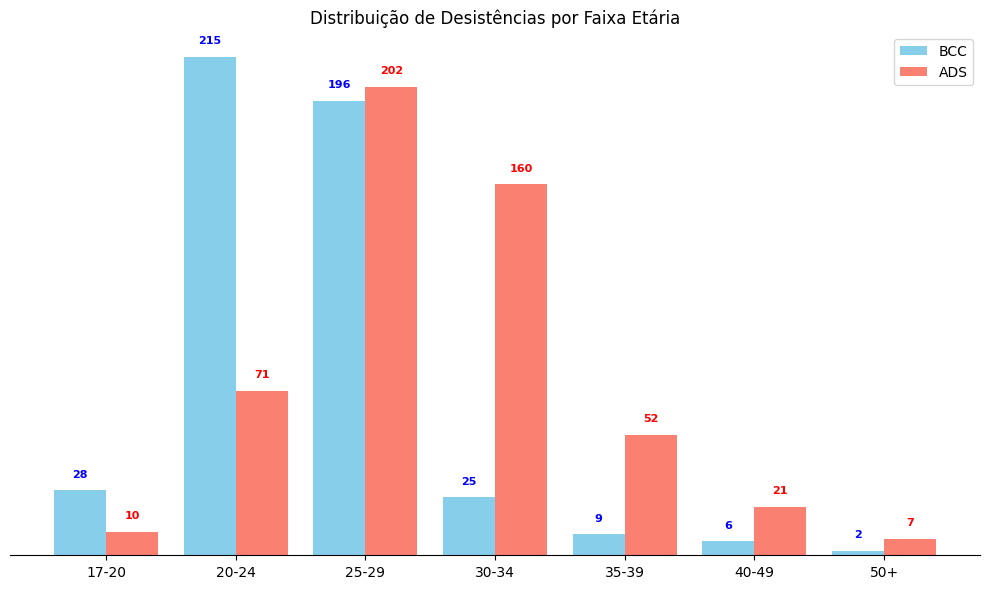

In [40]:
# Define as faixas etárias
bins = [17, 20, 25, 30, 35, 40, 50, 60]
labels = ['17-20', '20-24', '25-29', '30-34', '35-39', '40-49', '50+']

# Adiciona coluna de faixa etária
alunos_bcc['Faixa Etária'] = pd.cut(alunos_bcc['Idade'], bins=bins, labels=labels, right=False)
alunos_ads['Faixa Etária'] = pd.cut(alunos_ads['Idade'], bins=bins, labels=labels, right=False)

# Conta por faixa
bcc_counts = alunos_bcc['Faixa Etária'].value_counts().sort_index()
ads_counts = alunos_ads['Faixa Etária'].value_counts().sort_index()

# Gráfico de barras lado a lado
x = range(len(labels))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
bars_bcc = ax.bar([i - bar_width/2 for i in x], bcc_counts, width=bar_width, label='BCC', color='skyblue')
bars_ads = ax.bar([i + bar_width/2 for i in x], ads_counts, width=bar_width, label='ADS', color='salmon')

# Anotações nas barras BCC (exceto a primeira)
for bar in bars_bcc:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 5,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='blue'
    )

# Anotações nas barras ADS
for bar in bars_ads:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 5,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='red'
    )

# Configurações do gráfico
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('Quantidade de alunos')
ax.set_title('Distribuição de Desistências por Faixa Etária')
ax.legend()

plt.tight_layout()
plt.show()


Desistência por período

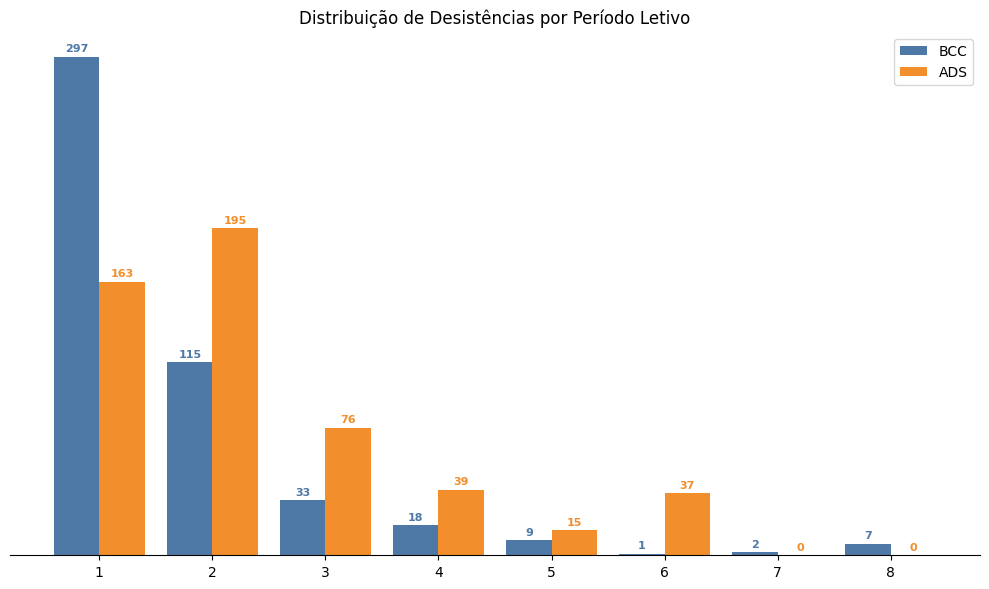

In [41]:
# Contagem por período
bcc_periodos = alunos_bcc['Período do Aluno'].value_counts().sort_index()
ads_periodos = alunos_ads['Período do Aluno'].value_counts().sort_index()

# Garante que ambos os dataframes compartilham o mesmo conjunto de períodos
todos_periodos = sorted(set(bcc_periodos.index).union(set(ads_periodos.index)))
bcc_counts = [bcc_periodos.get(p, 0) for p in todos_periodos]
ads_counts = [ads_periodos.get(p, 0) for p in todos_periodos]

# Gráfico de barras lado a lado
x = range(len(todos_periodos))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
bars_bcc = ax.bar([i - bar_width/2 for i in x], bcc_counts, width=bar_width, label='BCC', color='#4E79A7')  # azul escuro
bars_ads = ax.bar([i + bar_width/2 for i in x], ads_counts, width=bar_width, label='ADS', color='#F28E2B')  # laranja

# Anotações nas barras
for bar in bars_bcc:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        altura + 2,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='#4E79A7'
    )

for bar in bars_ads:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        altura + 2,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold',
        color='#F28E2B'
    )

# Configurações do gráfico
ax.set_xticks(x)
ax.set_xticklabels(todos_periodos)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('Quantidade de alunos')
ax.set_title('Distribuição de Desistências por Período Letivo')
ax.legend()

plt.tight_layout()
plt.show()


Características dos alunos BCC

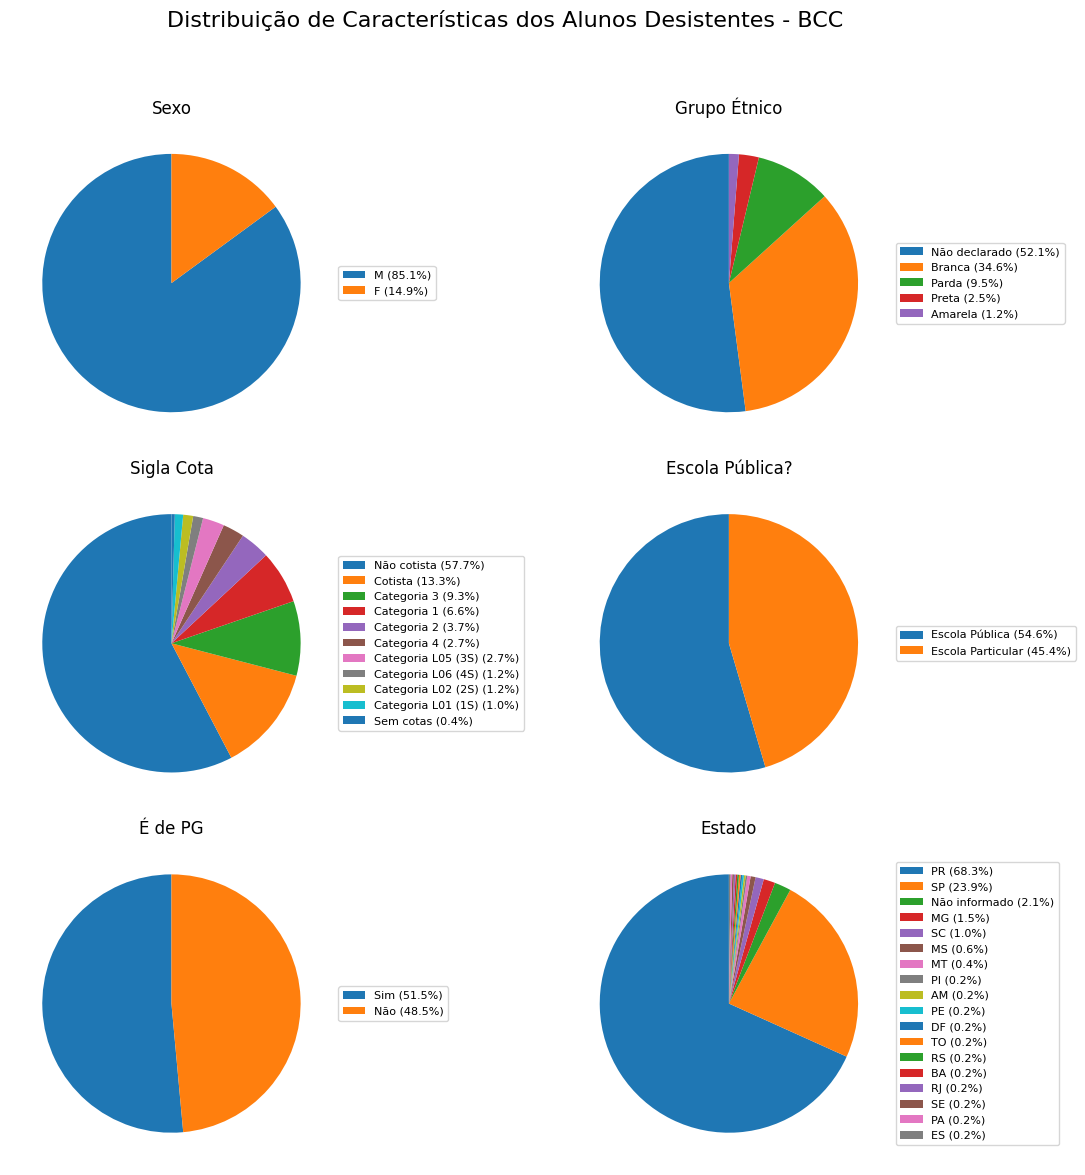

In [42]:
# Criar coluna 'É de Ponta Grossa'
temp = alunos_bcc.copy()
temp['É de PG'] = temp['Cidade'].apply(lambda x: 'Sim' if x == 'Ponta Grossa' else 'Não')

# Lista de colunas a serem analisadas
colunas = ['Sexo', 'Grupo (Étnico)', 'Sigla Cota', 'Escola Pública?', 'É de PG', 'Estado']
titulos = ['Sexo', 'Grupo Étnico', 'Sigla Cota', 'Escola Pública?', 'É de PG', 'Estado']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribuição de Características dos Alunos Desistentes - BCC', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(colunas):
    counts = temp[col].value_counts()
    ax = axes[i]
    wedges, texts = ax.pie(counts, startangle=90)

    ax.set_title(titulos[i])

    legend_labels = [
        f'{label} ({p:.1f}%)' 
        for label, p in zip(counts.index, counts / counts.sum() * 100)
    ]
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

for j in range(len(colunas), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


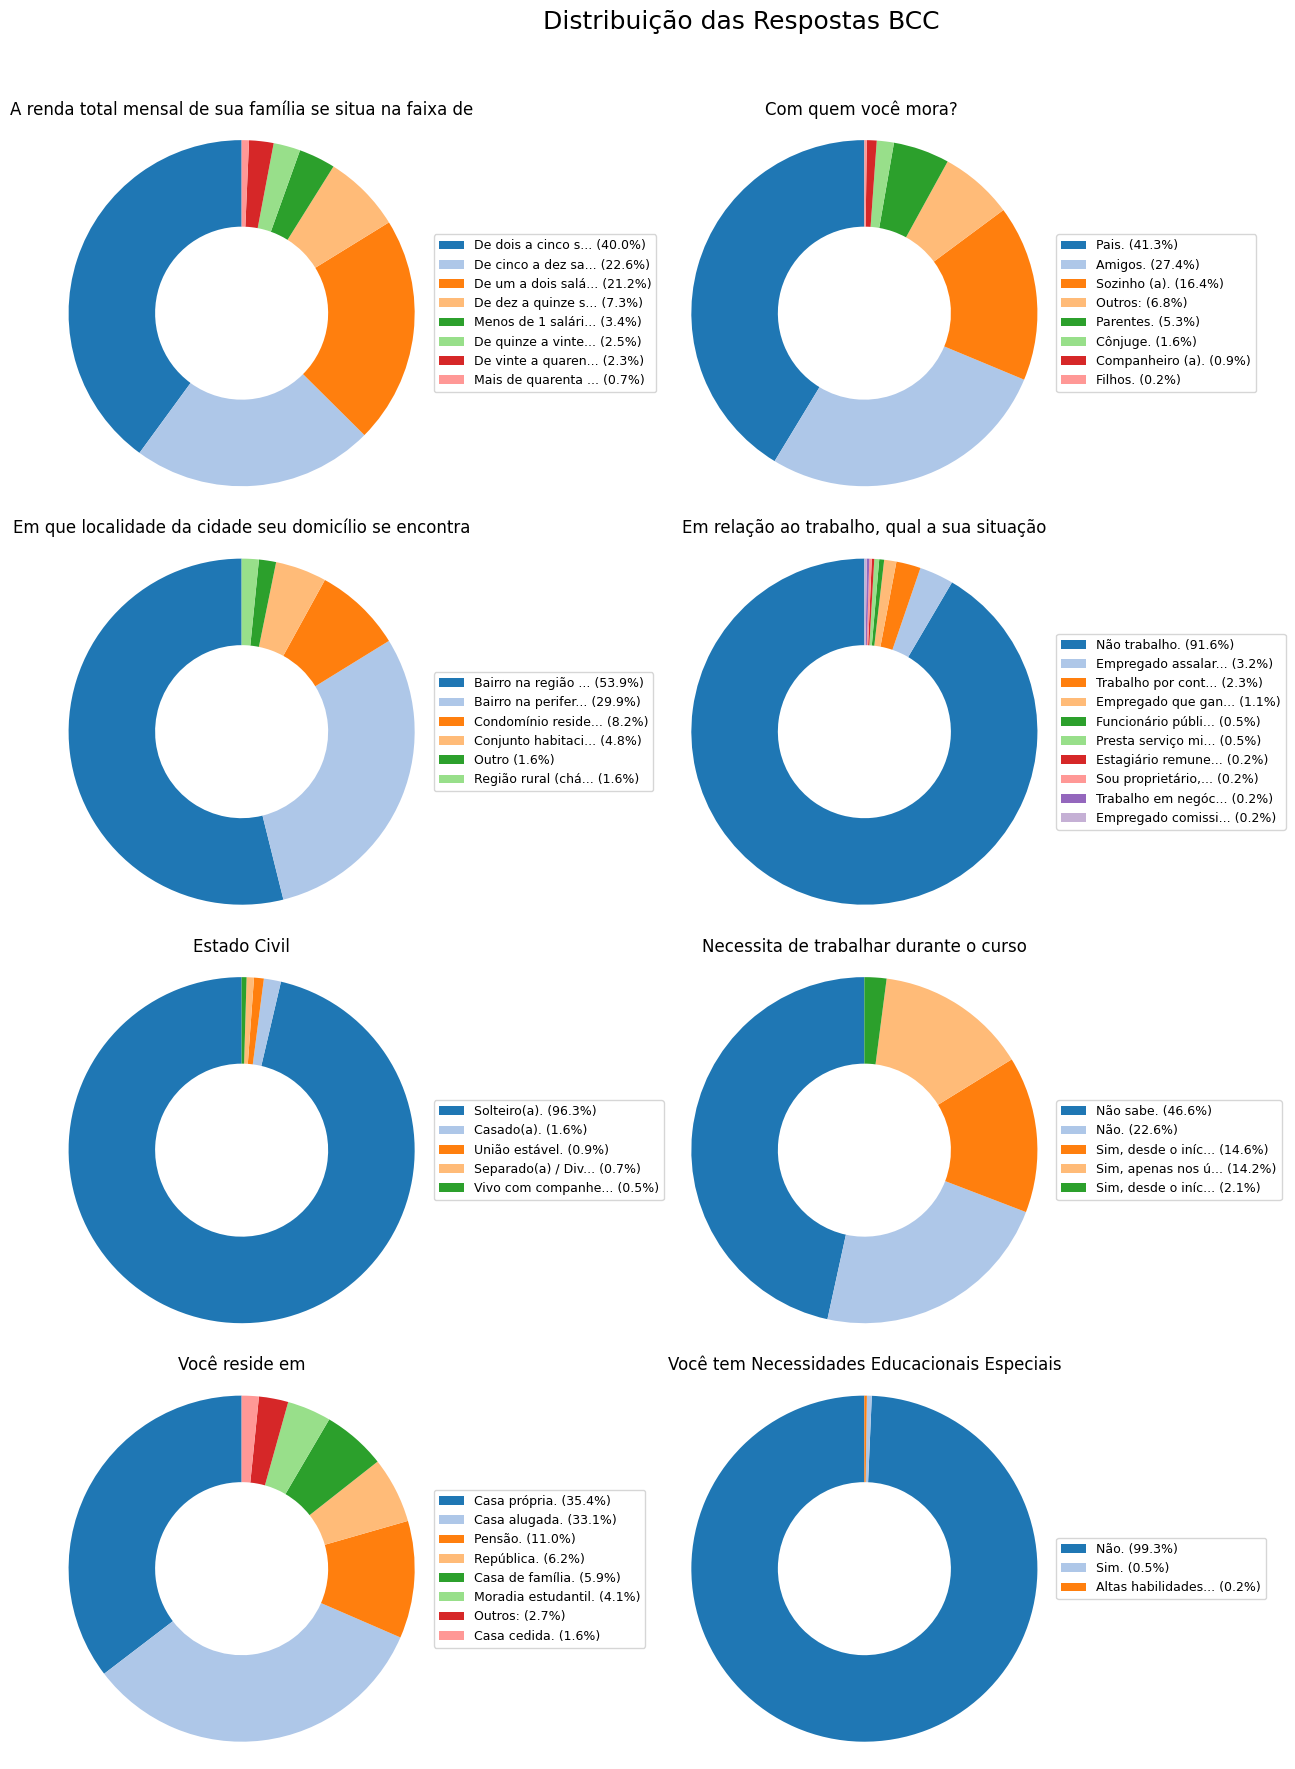

In [43]:
colunas_pizza = [
    'A renda total mensal de sua família se situa na faixa de', 
    'Com quem você mora? ',
    'Em que localidade da cidade seu domicílio se encontra',
    'Em relação ao trabalho, qual a sua situação',
    'Estado Civil',
    'Necessita de trabalhar durante o curso',
    'Você reside em',
    'Você tem Necessidades Educacionais Especiais'
]

def truncar_texto(texto, max_len=20):
    texto = str(texto)
    return texto if len(texto) <= max_len else texto[:max_len-3] + '...'

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
fig.suptitle('Distribuição das Respostas BCC', fontsize=18)

for i, col in enumerate(colunas_pizza):
    counts = questionario_bcc[col].value_counts(dropna=False)
    ax = axes[i//2, i%2]
    
    wedges, texts = ax.pie(
        counts, 
        startangle=90, 
        colors=plt.cm.tab20.colors[:len(counts)],
        wedgeprops=dict(width=0.5),
    )
    
    # Texto da legenda, truncando e mostrando porcentagem
    labels_legenda = [
        f"{truncar_texto(label)} ({count/counts.sum()*100:.1f}%)"
        for label, count in zip(counts.index, counts)
    ]
    
    ax.set_title(col, fontsize=12)
    ax.legend(
        wedges, labels_legenda, 
        loc='center left', bbox_to_anchor=(1, 0.5),
        fontsize=9
    )
    ax.axis('equal')  # Para pizza circular

# Desliga eixos extras se houver
total_subplots = 4*2
for j in range(len(colunas_pizza), total_subplots):
    axes[j//2, j%2].axis('off')

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.show()


Características dos alunos ADS

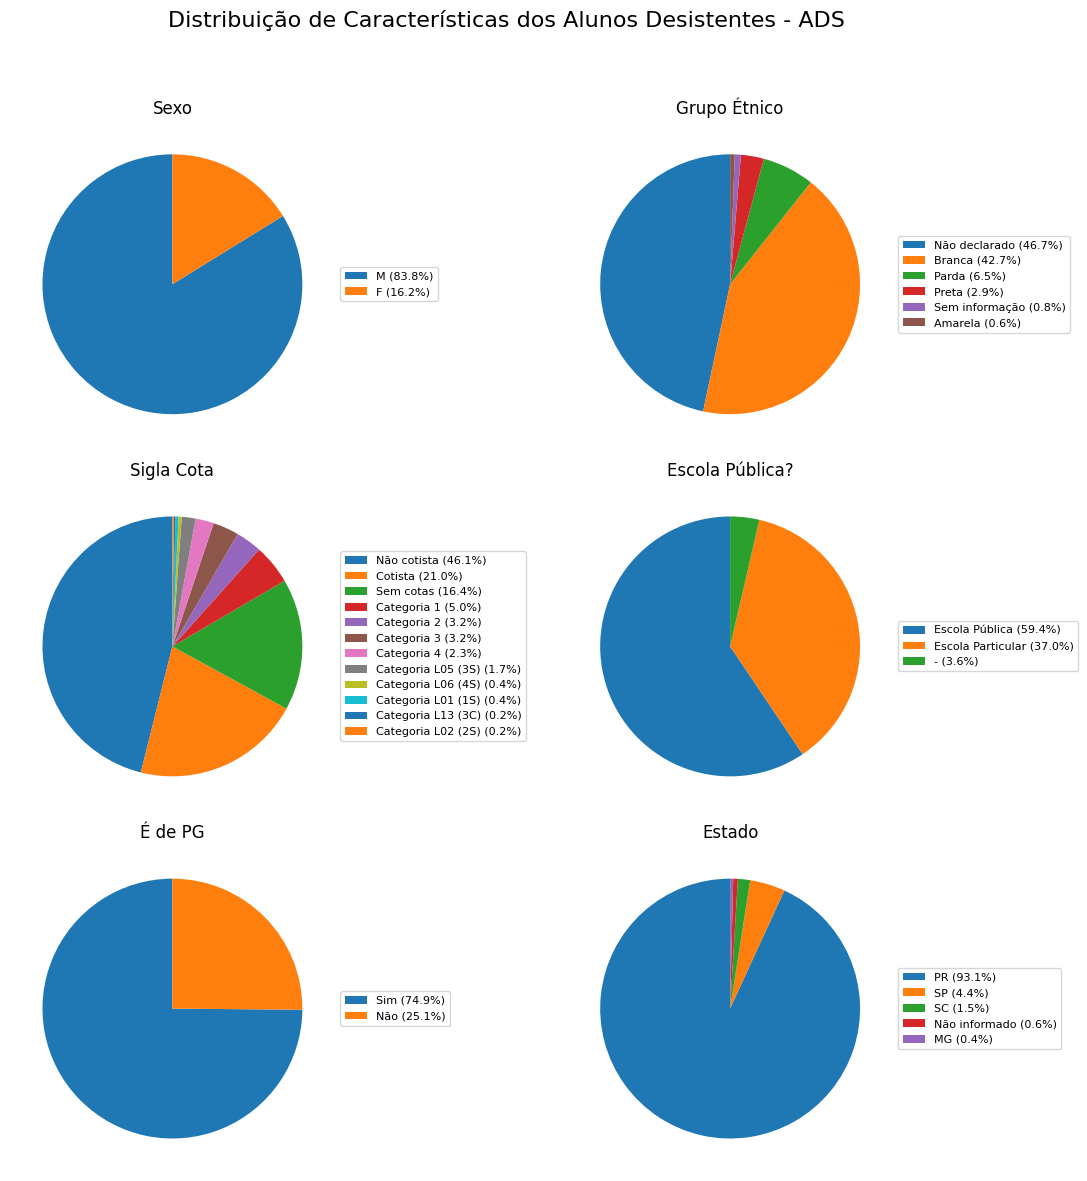

In [44]:
# Criar coluna 'É de Ponta Grossa'
temp = alunos_ads.copy()
temp['É de PG'] = temp['Cidade'].apply(lambda x: 'Sim' if x == 'Ponta Grossa' else 'Não')

# Lista de colunas a serem analisadas
colunas = ['Sexo', 'Grupo (Étnico)', 'Sigla Cota', 'Escola Pública?', 'É de PG', 'Estado']
titulos = ['Sexo', 'Grupo Étnico', 'Sigla Cota', 'Escola Pública?', 'É de PG', 'Estado']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribuição de Características dos Alunos Desistentes - ADS', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(colunas):
    counts = temp[col].value_counts()
    ax = axes[i]
    wedges, texts = ax.pie(counts, startangle=90)

    ax.set_title(titulos[i])

    legend_labels = [
        f'{label} ({p:.1f}%)' 
        for label, p in zip(counts.index, counts / counts.sum() * 100)
    ]
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

for j in range(len(colunas), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


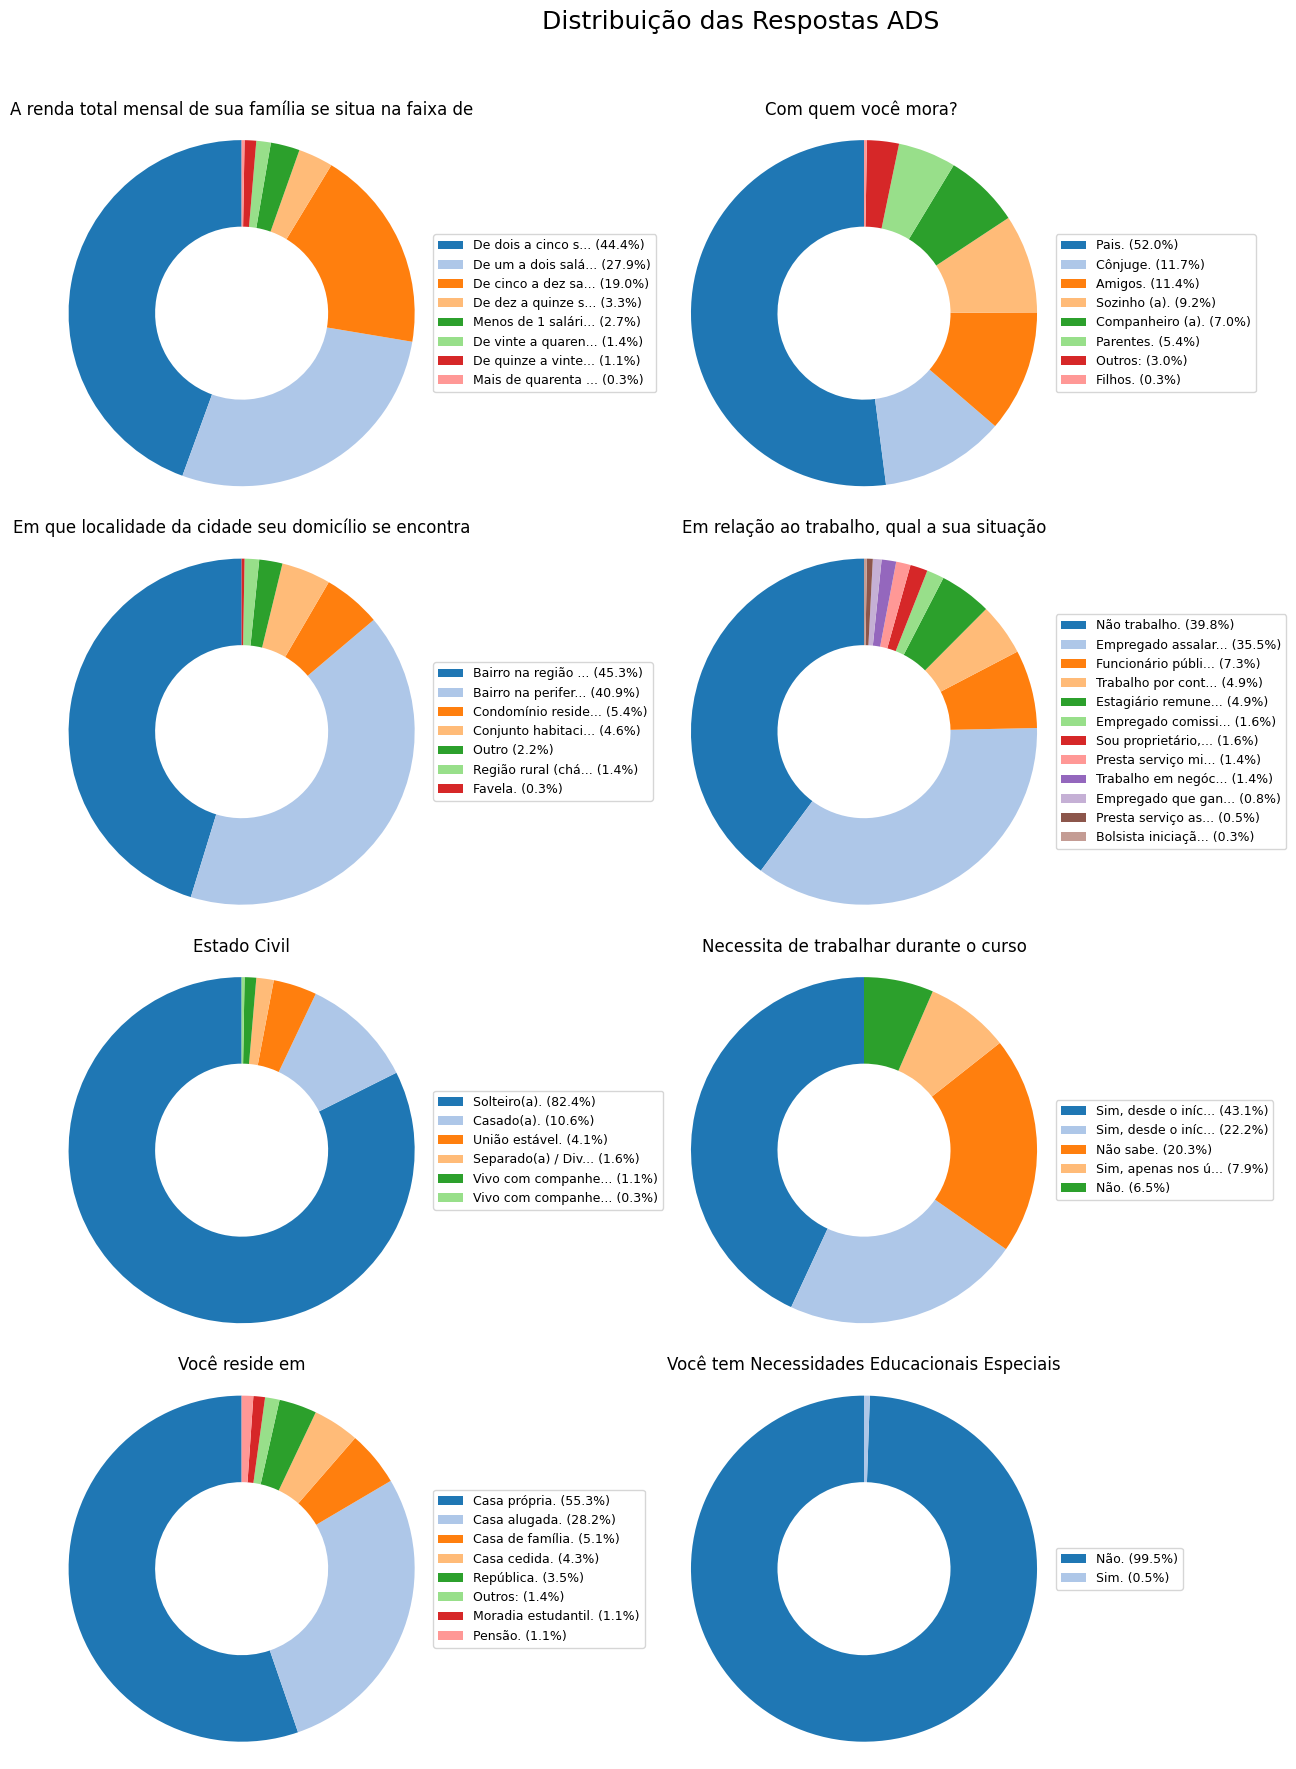

In [45]:
colunas_pizza = [
    'A renda total mensal de sua família se situa na faixa de', 
    'Com quem você mora? ',
    'Em que localidade da cidade seu domicílio se encontra',
    'Em relação ao trabalho, qual a sua situação',
    'Estado Civil',
    'Necessita de trabalhar durante o curso',
    'Você reside em',
    'Você tem Necessidades Educacionais Especiais'
]

def truncar_texto(texto, max_len=20):
    texto = str(texto)
    return texto if len(texto) <= max_len else texto[:max_len-3] + '...'

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
fig.suptitle('Distribuição das Respostas ADS', fontsize=18)

for i, col in enumerate(colunas_pizza):
    counts = questionario_ads[col].value_counts(dropna=False)
    ax = axes[i//2, i%2]
    
    wedges, texts = ax.pie(
        counts, 
        startangle=90, 
        colors=plt.cm.tab20.colors[:len(counts)],
        wedgeprops=dict(width=0.5),
    )
    
    # Texto da legenda, truncando e mostrando porcentagem
    labels_legenda = [
        f"{truncar_texto(label)} ({count/counts.sum()*100:.1f}%)"
        for label, count in zip(counts.index, counts)
    ]
    
    ax.set_title(col, fontsize=12)
    ax.legend(
        wedges, labels_legenda, 
        loc='center left', bbox_to_anchor=(1, 0.5),
        fontsize=9
    )
    ax.axis('equal')  # Para pizza circular

# Desliga eixos extras se houver
total_subplots = 4*2
for j in range(len(colunas_pizza), total_subplots):
    axes[j//2, j%2].axis('off')

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.show()


#### Tratamento das colunas categóricas (necessário caso algumas delas seja usado em ML)

In [46]:
# Tabela Alunos
colunas_categoricas = [
    "Curso",
    "Forma de Ingresso",
    "Tipo de Cota",
    "Sigla Cota",
    "Escola Pública?",
    "Sexo",
    "Cidade",
    "Estado",
    "Grupo (Étnico)",
]

# Definindo como tipo categórico
for coluna in colunas_categoricas:
    alunos[coluna] = alunos[coluna].astype("category")

print(alunos.info(), "\n\n")

# Exibindo detalhes das categorias
for coluna in alunos.select_dtypes(include="category"):
    print(f"{coluna}")
    print(f"{coluna}.cat.categories: {alunos[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {alunos[coluna].cat.ordered}")
    print(f"{coluna}.cat.codes: {alunos[coluna].cat.codes.unique()}")
    print()

# Codificando as categorias com LabelEncoder
alunos_codificado = alunos.copy()
for coluna in colunas_categoricas:
    le = LabelEncoder()
    alunos_codificado[coluna + '_codificado'] = le.fit_transform(alunos_codificado[coluna].astype(str))
    alunos_codificado = alunos_codificado.drop(coluna, axis=1)

# Exibindo as primeiras linhas com colunas codificadas
alunos_codificado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           1800 non-null   object  
 1   Ano Ingresso                 1800 non-null   int64   
 2   Per. Ingresso                1800 non-null   int64   
 3   Curso                        1800 non-null   category
 4   Forma de Ingresso            1800 non-null   category
 5   Tipo de Cota                 1800 non-null   category
 6   Sigla Cota                   1800 non-null   category
 7   Escola Pública?              1800 non-null   category
 8   Coeficiente                  1800 non-null   float64 
 9   Nota Enem                    1800 non-null   float64 
 10  Sexo                         1800 non-null   category
 11  Idade                        1800 non-null   int64   
 12  Cidade                       1800 non-null   category
 13  Est

id  Ano Ingresso  Per. Ingresso  Coeficiente  Nota Enem  Idade  \
0  +bwsow          2010              1       0.0222      634.3     37   
1  f511wn          2010              1       0.1852      623.2     27   
2  gwhga8          2010              1       0.1644      588.9     39   
3  t5fkjk          2010              1       0.0000      683.2     30   
4  3ewz5c          2010              1       0.2559      650.5     27   

   Período do Aluno  Ano Desistência  Período Desistências  Média de Nota  \
0                 1             2010                     1       0.166667   
1                 1             2010                     1       1.916667   
2                 1             2010                     1       1.716667   
3                 1             2010                     1       0.000000   
4                 1             2010                     1       2.483333   

   ...  evasor  Curso_codificado  Forma de Ingresso_codificado  \
0  ...    True                 0                             4   
1  ...    True                 0                             4   
2  ...    True                 0                             4   
3  ...    True                 0                             4   
4  ...    True                 0                             4   

   Tipo de Cota_codificado  Sigla Cota_codificado  Escola Pública?_codificado  \
0                       11                     10                           2   
1                        0                     11                           1   
2                       11                     10                           2   
3                        0                     11                           1   
4                       11                     10                           2   

   Sexo_codificado  Cidade_codificado  Estado_codificado  \
0                1                155                 13   
1                1                 81                 13   
2                1                 53                 13   
3                0                 47                 13   
4                1                200                 19   

   Grupo (Étnico)_codificado  
0                          3  
1                          1  
2                          3  
3                          1  
4                          3  

[5 rows x 23 columns]

In [47]:
# Tabela Historico
colunas_categoricas = [
    "Nome Disciplina",
    "Situação Disc."
]

# Definindo como tipo categórico
for coluna in colunas_categoricas:
    historico[coluna] = historico[coluna].astype("category")

print(historico.info(), "\n\n")

# Exibindo detalhes das categorias
for coluna in historico.select_dtypes(include="category"):
    print(f"{coluna}")
    print(f"{coluna}.cat.categories: {historico[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {historico[coluna].cat.ordered}")
    print(f"{coluna}.cat.codes: {historico[coluna].cat.codes.unique()}")
    print()

# Codificando as categorias com LabelEncoder
historico_codificado = historico.copy()
for coluna in colunas_categoricas:
    le = LabelEncoder()
    historico_codificado[coluna + '_codificado'] = le.fit_transform(historico_codificado[coluna].astype(str))
    historico_codificado = historico_codificado.drop(coluna, axis=1)

# Exibindo as primeiras linhas com colunas codificadas
historico_codificado.head()

<class 'pandas.core.frame.DataFrame'>
Index: 56710 entries, 1 to 57241
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 56710 non-null  object  
 1   Nome Disciplina    56710 non-null  category
 2   Ano Lanç.          56710 non-null  int64   
 3   Per. Lanç.         56710 non-null  int64   
 4   Nota               56710 non-null  float64 
 5   Freq.(%)           56710 non-null  float64 
 6   Situação Disc.     56710 non-null  category
 7   Média da Turma     56710 non-null  float64 
 8   Qtde Alunos Turma  56710 non-null  int64   
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 3.6+ MB
None 


Nome Disciplina
Nome Disciplina.cat.categories: Index([' Ergonomia', ' Mecânica Geral 2', ' Ética', 'ALEMÃO 1', 'ALGORITMOS',
       'ALGORITMOS E ESTRUTURA DE DADOS 1',
       'ALGORITMOS E ESTRUTURA DE DADOS 2', 'ANÁLISE DE ALGORITMOS',
       'ANÁLISE DE DADOS ESTATÍSTICO

id  Ano Lanç.  Per. Lanç.  Nota  Freq.(%)  Média da Turma  \
#                                                                  
1  a+ntz8       2007           1   0.0      41.0             3.7   
2  a+ntz8       2007           1   7.1      97.4             5.2   
3  a+ntz8       2007           1   9.0      94.7             6.0   
4  a+ntz8       2007           1   0.6      67.8             4.9   
5  a+ntz8       2007           1   4.7      84.6             5.8   

   Qtde Alunos Turma  Nome Disciplina_codificado  Situação Disc._codificado  
#                                                                            
1                 46                           4                         10  
2                 40                          30                          3  
3                 46                          73                          3  
4                 47                         318                         10  
5                 40                          95                          9

In [48]:
# Tabela Questionario
colunas_categoricas = questionario.columns.copy().drop('id')

# Definindo como tipo categórico
for coluna in colunas_categoricas:
    questionario[coluna] = questionario[coluna].astype("category")

print(questionario.info(), "\n\n")

# Exibindo detalhes das categorias
for coluna in questionario.select_dtypes(include="category"):
    print(f"{coluna}")
    print(f"{coluna}.cat.categories: {questionario[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {questionario[coluna].cat.ordered}")
    print(f"{coluna}.cat.codes: {questionario[coluna].cat.codes.unique()}")
    print()

# Codificando as categorias com LabelEncoder
questionario_codificado = questionario.copy()
for coluna in colunas_categoricas:
    le = LabelEncoder()
    questionario_codificado[coluna + '_codificado'] = le.fit_transform(questionario_codificado[coluna].astype(str))
    questionario_codificado = questionario_codificado.drop(coluna, axis=1)

# Exibindo as primeiras linhas com colunas codificadas
questionario_codificado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 23 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   id                                                                          1622 non-null   object  
 1   A renda total mensal de sua família se situa na faixa de                    1622 non-null   category
 2   Com quem você mora?                                                         1622 non-null   category
 3   Como pretende se locomover até a UTFPR durante o seu curso                  1622 non-null   category
 4   Em que localidade da cidade seu domicílio se encontra                       1622 non-null   category
 5   Em relação ao trabalho, qual a sua situação                                 1622 non-null   category
 6   Estado Civil                            

Pergunta      id  \
0         +1hm9t   
1         +1oahc   
2         +4biin   
3         +4ismk   
4         +4jfnz   

Pergunta  A renda total mensal de sua família se situa na faixa de_codificado  \
0                                                         2                     
1                                                         2                     
2                                                         2                     
3                                                         2                     
4                                                         0                     

Pergunta  Com quem você mora? _codificado  \
0                                       5   
1                                       5   
2                                       0   
3                                       5   
4                                       2   

Pergunta  Como pretende se locomover até a UTFPR durante o seu curso_codificado  \
0                                                         5                       
1                                                         5                       
2                                                         5                       
3                                                         3                       
4                                                         5                       

Pergunta  Em que localidade da cidade seu domicílio se encontra_codificado  \
0                                                         1                  
1                                                         1                  
2                                                         5                  
3                                                         1                  
4                                                         1                  

Pergunta  Em relação ao trabalho, qual a sua situação_codificado  \
0                                                         6        
1                                                         6        
2                                                         1        
3                                                         6        
4                                                         5        

Pergunta  Estado Civil_codificado  \
0                               2   
1                               2   
2                               2   
3                               2   
4                               0   

Pergunta  Expectativa com o curso de graduação_codificado  \
0                                                       1   
1                                                       1   
2                                                       3   
3                                                       3   
4                                                       0   

Pergunta  Motivo que o levou a escolher a UTFPR_codificado  \
0                                                        5   
1                                                        5   
2                                                        5   
3                                                        5   
4                                                        5   

Pergunta  Naturalidade_codificado  ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               0  ...   

Pergunta  Qual a sua participação na vida econômica do grupo familiar_codificado  \
0                                                         0                        
1                                                         0                        
2                                                         5                        
3                                                         0                        
4                                                         3                        

Pergunta  Qual o grau m

#### Criando dataframe final para análises

In [49]:
# Selecionando apenas colunas que se mostraram pertinentes
alunos_final = alunos_codificado.copy()
alunos_final = alunos_final.drop(columns=['Ano Ingresso', 'Per. Ingresso', 'Nota Enem', 'Período Desistências', 'Forma de Ingresso_codificado', 'Tipo de Cota_codificado',
                                          'Escola Pública?_codificado', 'Cidade_codificado', 'Estado_codificado', 'Sigla Cota_codificado'], axis=1)
alunos_final = alunos_final.rename(columns={'evasor': 'Evasor', 'Curso_codificado':'Curso', 'Sexo_codificado':'Sexo', 'Grupo (Étnico)_codificado':'Etnia',
                                            'Quantidade de Reprovações':'Reprovações', 'Quantidade de Cancelamentos': 'Cancelamentos'})

questionario_editado = questionario_codificado[['id',
    'A renda total mensal de sua família se situa na faixa de_codificado',
    'Como pretende se locomover até a UTFPR durante o seu curso_codificado',
    'Em que localidade da cidade seu domicílio se encontra_codificado',
    'Em relação ao trabalho, qual a sua situação_codificado',
    'Estado Civil_codificado',
    'Você tem Necessidades Educacionais Especiais_codificado'
]].copy()

questionario_editado = questionario_editado.rename(columns={
    'A renda total mensal de sua família se situa na faixa de_codificado'   : 'Renda',
    'Como pretende se locomover até a UTFPR durante o seu curso_codificado' : 'Locomoção',
    'Em que localidade da cidade seu domicílio se encontra_codificado'      : 'Moradia',
    'Em relação ao trabalho, qual a sua situação_codificado'                : 'Trabalho',
    'Estado Civil_codificado'                                               : 'Estado Civil',
    'Você tem Necessidades Educacionais Especiais_codificado'               : 'Necessidades Especiais'
})

alunos_final = alunos_final.merge(questionario_editado, on='id', how='inner')
alunos_final = alunos_final.drop('id', axis=1)

display(alunos_final)

Coeficiente  Idade  Período do Aluno  Ano Desistência  Média de Nota  \
0          0.1474     27                 1             2010       2.066667   
1          0.3415     27                 1             2011       4.083333   
2          0.2575     27                 1             2011       3.213333   
3          0.1643     37                 1             2011       1.791667   
4          0.4652     29                 2             2011       5.076190   
...           ...    ...               ...              ...            ...   
1549       0.7300     39                 1             2019       7.300000   
1550       0.7529     26                 2             2019       7.692308   
1551       0.8500     20                 1             2019       8.500000   
1552       0.7808     21                 2             2019       7.842857   
1553       0.7413     21                 4             2020       7.483333   

      Média de Frequência  Reprovações  Cancelamentos  Evasor  Curso  Sexo  \
0               85.633333            5              0    True      0     1   
1               94.950000            4              0    True      0     0   
2               71.866667           10              0    True      0     1   
3               40.875000            9              0    True      0     1   
4               89.323810           12              0    True      0     0   
...                   ...          ...            ...     ...    ...   ...   
1549            86.233333            0              0   False      1     1   
1550            88.269231            0              0   False      1     1   
1551            74.400000            0              0   False      1     1   
1552            82.728571            0              0   False      1     1   
1553            89.522222            0              0   False      1     0   

      Etnia  Renda  Locomoção  Moradia  Trabalho  Estado Civil  \
0         3      4          5        0         6             2   
1         1      2          5        1         6             2   
2         1      2          5        0         6             2   
3         3      4          5        0         1             2   
4         3      2          5        1         6             2   
...     ...    ...        ...      ...       ...           ...   
1549      1      2          3        0         9             0   
1550      5      5          5        1         4             2   
1551      1      2          5        0         1             2   
1552      1      2          5        2        11             2   
1553      5      7          5        1         6             2   

      Necessidades Especiais  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
...                      ...  
1549                       1  
1550                       1  
1551                       1  
1552                       1  
1553                       1  

[1554 rows x 18 columns]

### Análise exploratória (ambos os cursos)

array([[<Axes: xlabel='Coeficiente', ylabel='Coeficiente'>,
        <Axes: xlabel='Idade', ylabel='Coeficiente'>,
        <Axes: xlabel='Período do Aluno', ylabel='Coeficiente'>,
        <Axes: xlabel='Ano Desistência', ylabel='Coeficiente'>,
        <Axes: xlabel='Média de Nota', ylabel='Coeficiente'>,
        <Axes: xlabel='Média de Frequência', ylabel='Coeficiente'>,
        <Axes: xlabel='Reprovações', ylabel='Coeficiente'>,
        <Axes: xlabel='Cancelamentos', ylabel='Coeficiente'>,
        <Axes: xlabel='Curso', ylabel='Coeficiente'>,
        <Axes: xlabel='Sexo', ylabel='Coeficiente'>,
        <Axes: xlabel='Etnia', ylabel='Coeficiente'>,
        <Axes: xlabel='Renda', ylabel='Coeficiente'>,
        <Axes: xlabel='Locomoção', ylabel='Coeficiente'>,
        <Axes: xlabel='Moradia', ylabel='Coeficiente'>,
        <Axes: xlabel='Trabalho', ylabel='Coeficiente'>,
        <Axes: xlabel='Estado Civil', ylabel='Coeficiente'>,
        <Axes: xlabel='Necessidades Especiais', ylabel='Co

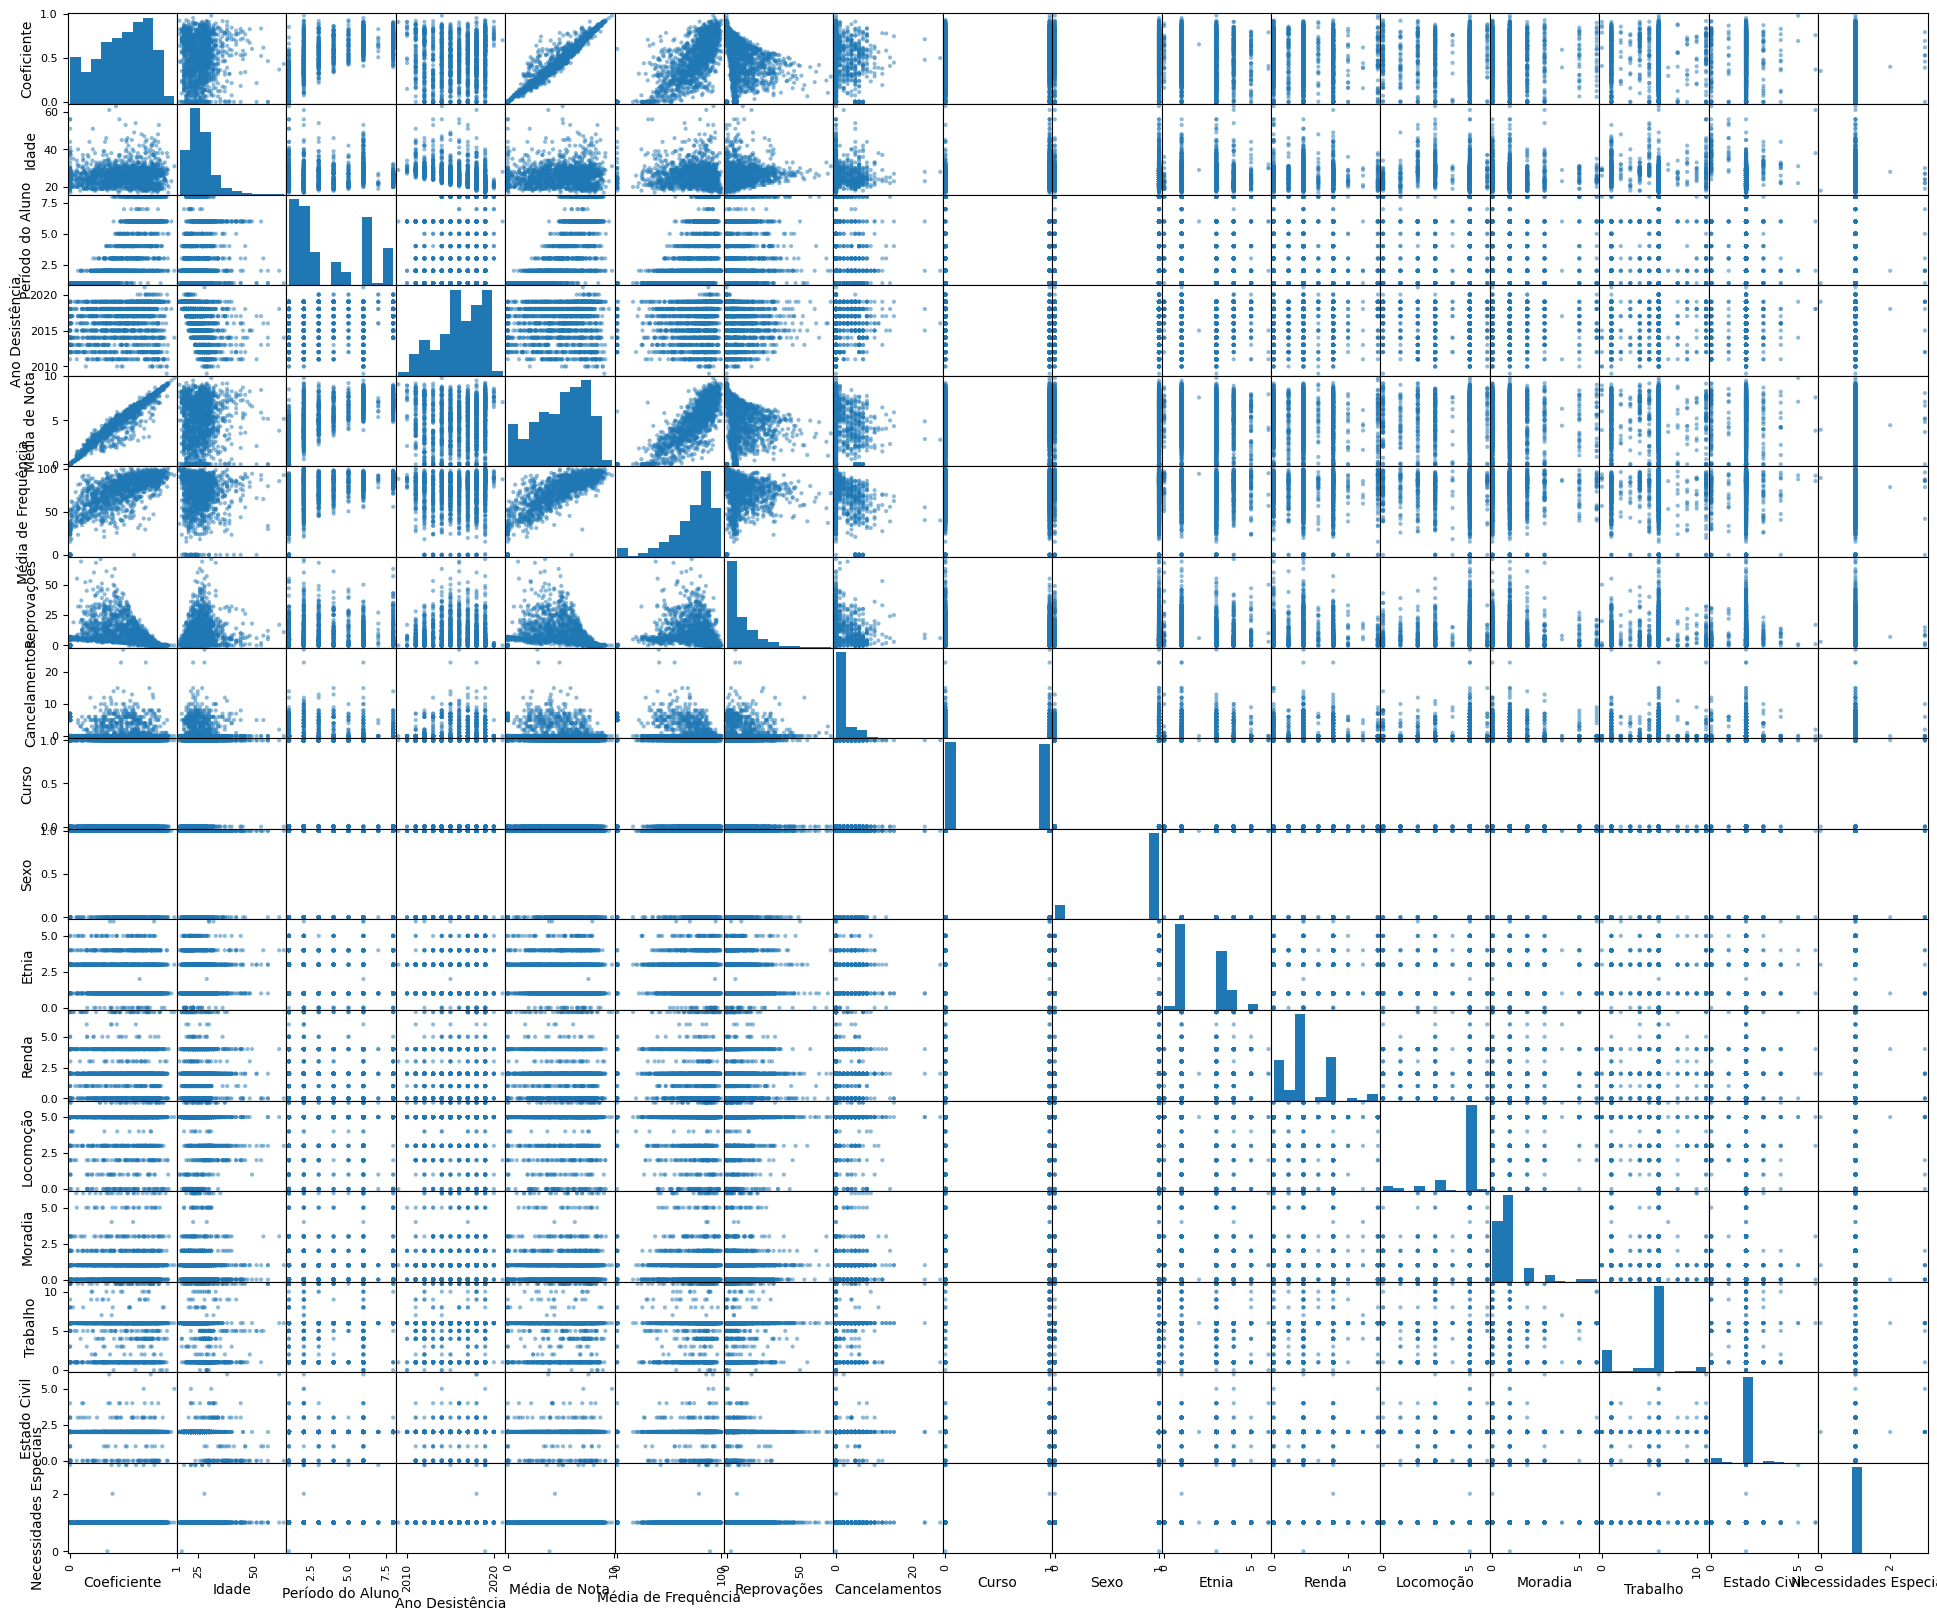

In [50]:
# Apresentar a matriz de correção da base
temp = alunos_final.copy().drop('Evasor', axis=1)
pd.plotting.scatter_matrix(temp, figsize=(24, 20))

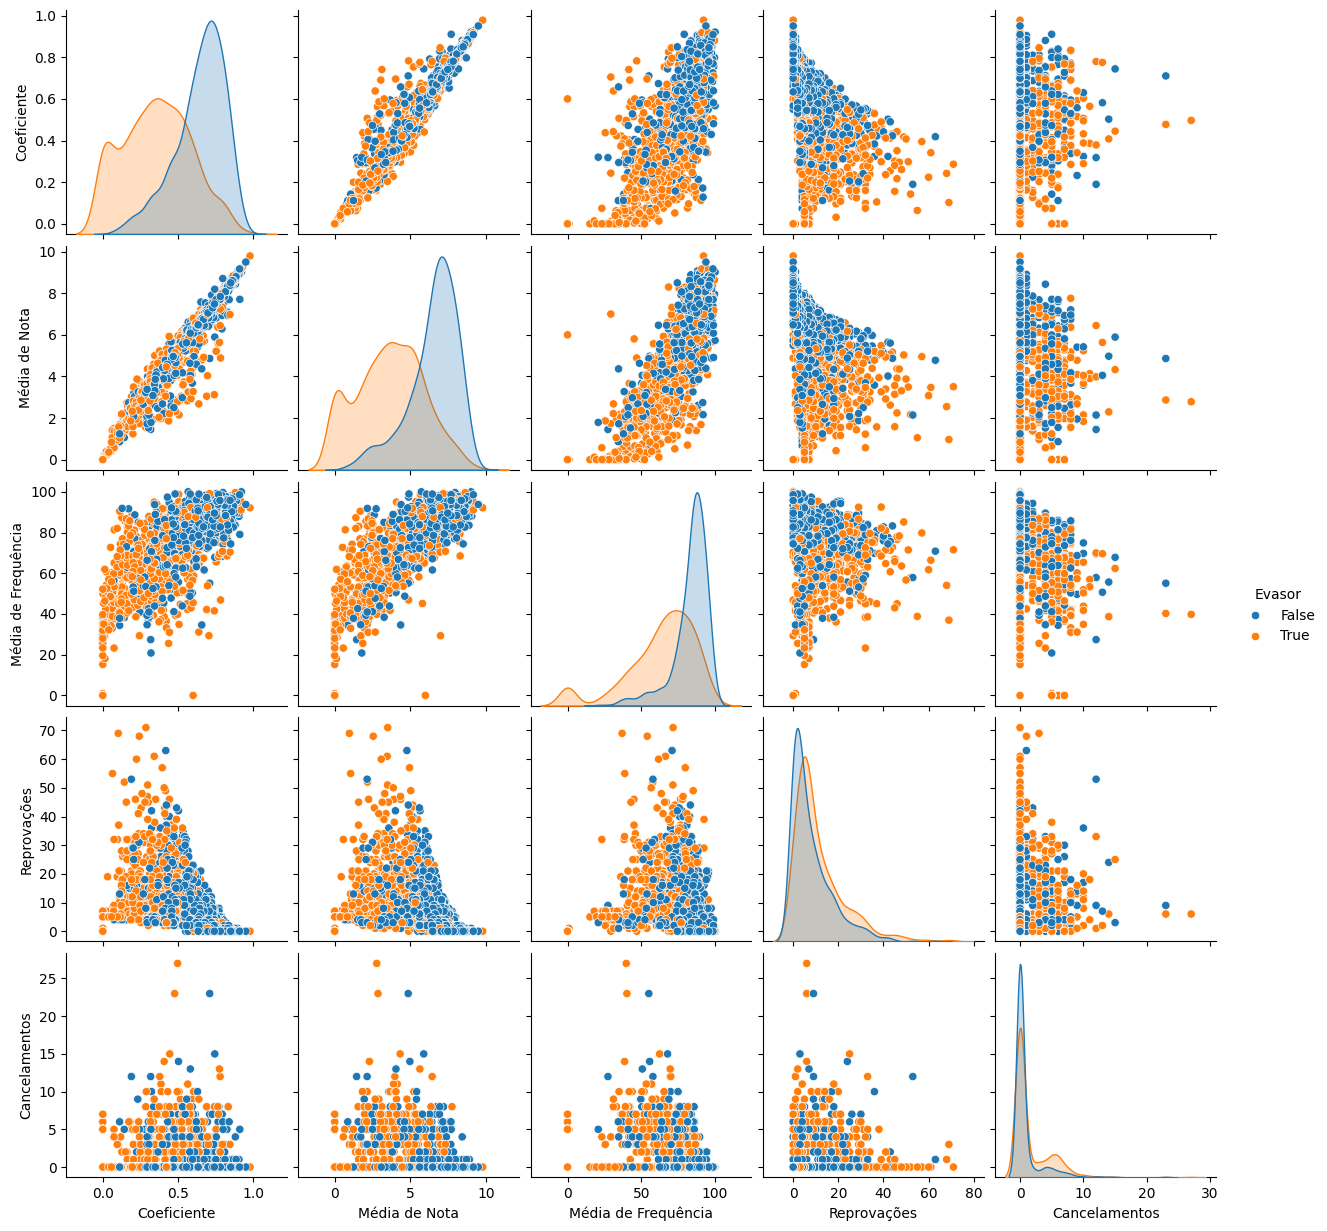

In [58]:
# Apresentar a matriz de correlação da base plotando no pairplot. 
# Somente para as maiores correlações 
temp = alunos_final.copy().drop(columns=['Curso', 'Sexo', 'Etnia', 'Renda', 'Locomoção', 'Moradia', 'Trabalho', 'Estado Civil', 'Necessidades Especiais', 
                                         'Ano Desistência', 'Período do Aluno', 'Idade'], axis=1)
sns.pairplot(temp,hue='Evasor')# ,diag_kind='hist')
plt.show()

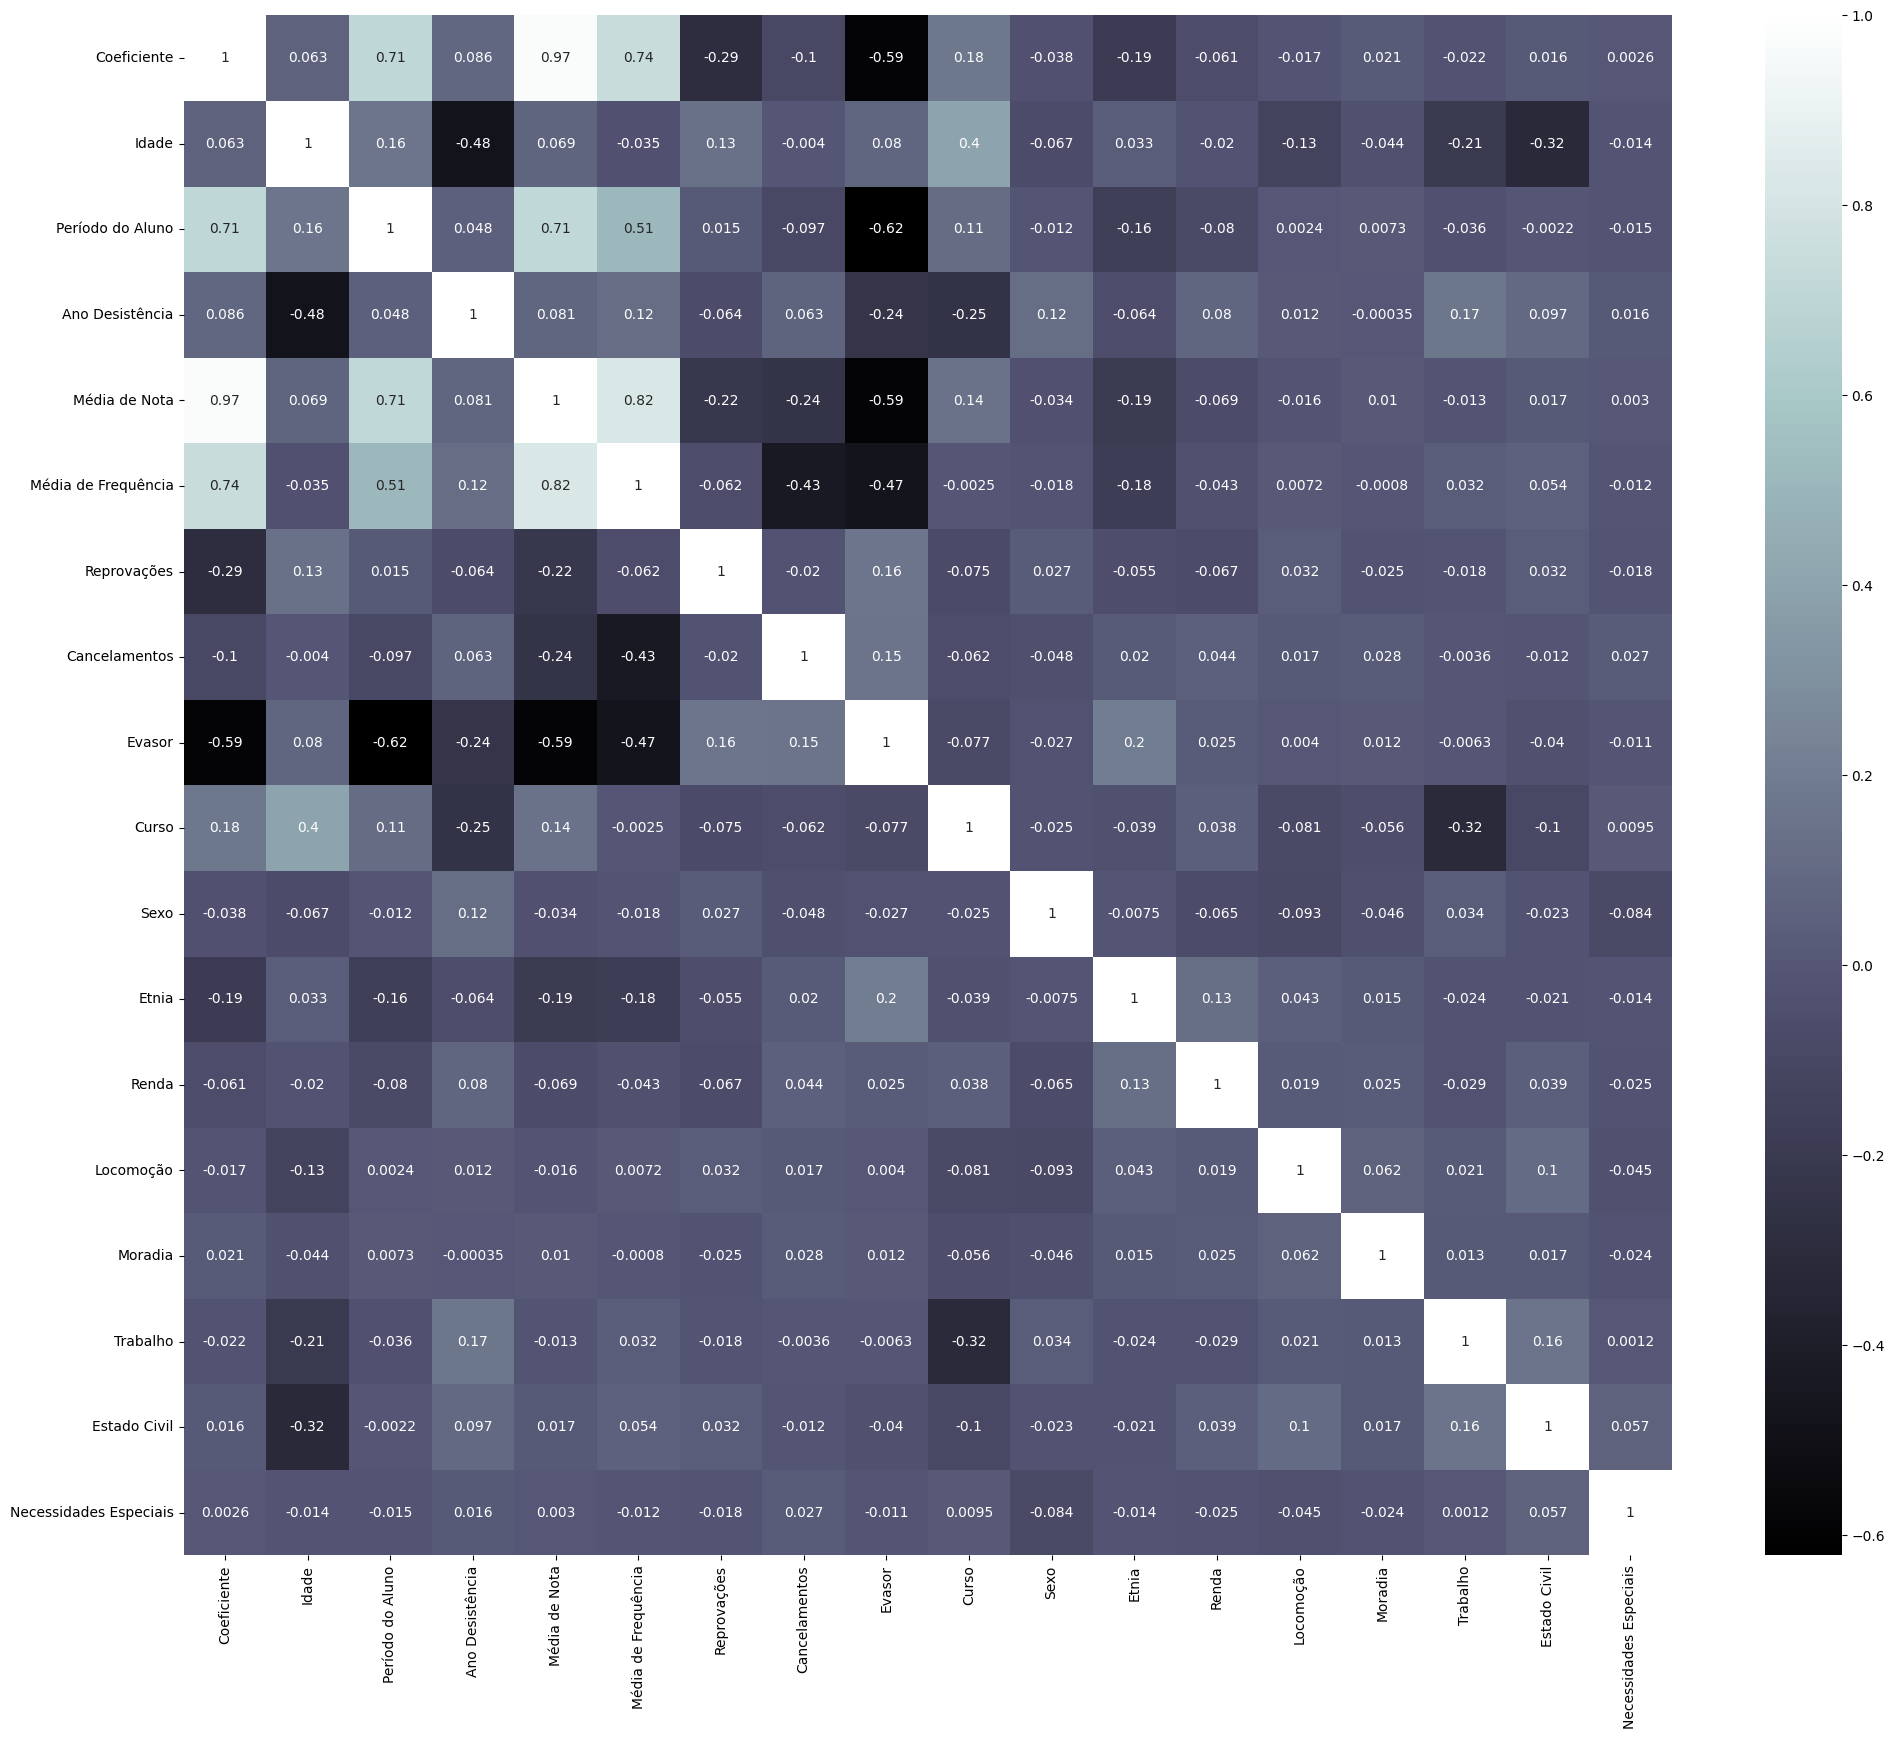

In [52]:
# Verificando a correlação entre os dados utilizando o heatmap. 
fig, ax = plt.subplots(figsize = (24,20))
sns.heatmap(alunos_final.corr(),annot=True,cmap='bone')
plt.show()

#### Conclusão

A análise exploratória demonstra que o desempenho do aluno tem mais relação com a evasão, se comparado às questões socioeconômicas.
No entanto, seria interessante realizar testes em ML com essas colunas socioeconômicas também.

Dataframe final para algoritmos:

In [60]:
display(alunos_final)

Coeficiente  Idade  Período do Aluno  Ano Desistência  Média de Nota  \
0          0.1474     27                 1             2010       2.066667   
1          0.3415     27                 1             2011       4.083333   
2          0.2575     27                 1             2011       3.213333   
3          0.1643     37                 1             2011       1.791667   
4          0.4652     29                 2             2011       5.076190   
...           ...    ...               ...              ...            ...   
1549       0.7300     39                 1             2019       7.300000   
1550       0.7529     26                 2             2019       7.692308   
1551       0.8500     20                 1             2019       8.500000   
1552       0.7808     21                 2             2019       7.842857   
1553       0.7413     21                 4             2020       7.483333   

      Média de Frequência  Reprovações  Cancelamentos  Evasor  Curso  Sexo  \
0               85.633333            5              0    True      0     1   
1               94.950000            4              0    True      0     0   
2               71.866667           10              0    True      0     1   
3               40.875000            9              0    True      0     1   
4               89.323810           12              0    True      0     0   
...                   ...          ...            ...     ...    ...   ...   
1549            86.233333            0              0   False      1     1   
1550            88.269231            0              0   False      1     1   
1551            74.400000            0              0   False      1     1   
1552            82.728571            0              0   False      1     1   
1553            89.522222            0              0   False      1     0   

      Etnia  Renda  Locomoção  Moradia  Trabalho  Estado Civil  \
0         3      4          5        0         6             2   
1         1      2          5        1         6             2   
2         1      2          5        0         6             2   
3         3      4          5        0         1             2   
4         3      2          5        1         6             2   
...     ...    ...        ...      ...       ...           ...   
1549      1      2          3        0         9             0   
1550      5      5          5        1         4             2   
1551      1      2          5        0         1             2   
1552      1      2          5        2        11             2   
1553      5      7          5        1         6             2   

      Necessidades Especiais  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
...                      ...  
1549                       1  
1550                       1  
1551                       1  
1552                       1  
1553                       1  

[1554 rows x 18 columns]

In [59]:
alunos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Coeficiente             1554 non-null   float64
 1   Idade                   1554 non-null   int64  
 2   Período do Aluno        1554 non-null   int64  
 3   Ano Desistência         1554 non-null   int64  
 4   Média de Nota           1554 non-null   float64
 5   Média de Frequência     1554 non-null   float64
 6   Reprovações             1554 non-null   int64  
 7   Cancelamentos           1554 non-null   int64  
 8   Evasor                  1554 non-null   bool   
 9   Curso                   1554 non-null   int32  
 10  Sexo                    1554 non-null   int32  
 11  Etnia                   1554 non-null   int32  
 12  Renda                   1554 non-null   int32  
 13  Locomoção               1554 non-null   int32  
 14  Moradia                 1554 non-null   

## Algoritmos de aprendizado

#### Algoritmo AAA
Descrição: blá blá

In [53]:
# Código aqui

#### Algoritmo BBB
Descrição: blá blá

In [54]:
# Código aqui

#### Algoritmo CCC
Descrição: blá blá

In [55]:
# Código aqui

#### Algoritmo DDD
Descrição: blá blá

In [56]:
# Código aqui